# Импорт библиотек

In [153]:
#!pip install pptx
#!pip install numpy
#!pip install datetime
#!pip install matplotlib
#!pip install pandas
#!pip install re
#!pip install xlrd
#!pip install psycopg2
#!pip install openpyxl
#!pip install altair

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import datetime
from datetime import date
import pandas as pd

import pptx
from pptx import Presentation
from pptx.util import Cm
from pptx.enum.text import PP_ALIGN
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE
from pptx.enum.dml import MSO_THEME_COLOR
from pptx.enum.dml import MSO_LINE_DASH_STYLE
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.enum.shapes import MSO_AUTO_SHAPE_TYPE
from pptx.enum.text import MSO_ANCHOR
from pptx.enum.text import MSO_AUTO_SIZE

# Импорт файлов

In [3]:
from first_lvl_graph import draw_graph_1_lvl
from dev_plan_graph_diag import draw_dev_plan_graph_accum, draw_dev_plan_diag_1, draw_dev_plan_diag_2
from dev_plan_structure_graph import draw_dev_plan_structure
from RD_SMR_graphs import draw_RD_SMR_graphs
from big_table import draw_big_table
from inventory_diagram import draw_inventory_diagram

# Импорт путей к картинкам

In [4]:
icon_path = 'system_photo/icon.png'
icon2_path = 'system_photo/icon2.png'
background_path = 'system_photo/background.png'
plot_path = 'system_photo/plot.png'

# Функции

## Функции, связанные непосредственно с python-pptx и презентацией

### Функции разметки

In [5]:
def resize_text(rect_height, rect_width, text, fontsize):
    
    #text = "ИНВЕНТАРИЗАЦИЯ ПРОЕКТА СООРУЖЕНИЕ АЭС «РУППУР» НА ПРЕДМЕТ НАЛИЧИЯ РИСКОВ СРЫВА ПОnnnnnnnnnnnnnnnnСТАВОК ОБОРУДОВАНИЯ И КОМПЛЕКТУЮЩИХ ИЗ 3-Х СТРАН"
    fig = plt.figure(figsize = (rect_width, rect_height))
    
    gs = GridSpec(ncols = 1, nrows = 1, figure = fig, wspace=0, hspace=0)
    ax = plt.subplot(gs[: , :])
    # изменяем текст (переносим строки или уменьшаем шрифт) так, чтобы он влезал в график
    text, fontsize = make_width(fig, ax, text, fontsize)
    text, fontsize = make_height(fig, ax, text, fontsize)
    
    # xmin, xmax = ax.get_xlim()  # получаем координаты начала и конца оси x
    # ymin, ymax = ax.get_ylim()  # получаем координаты начала и конца оси y
            
    # ax.text(xmin, (ymin + ymax) / 2, text, fontsize = fontsize, color = '#1A3C7B', va = 'center', ha = 'left', wrap = True)
            
    #  # убираем оси графика
    # plt.xticks([])
    # plt.yticks([])

    return text, fontsize

In [6]:
# функция создания и отрисовки заголовка слайда
def name_of_slide(slide, name, subinf):
    left = Cm(3.23)
    top = Cm(-0.25)
    height = 1.16
    width = 16 - 1.27
    fontsize = 32
    name, fontsize = resize_text(height * 1.2, width * 1.5, name, fontsize)
    width = Inches(16 - 1.27)
    height = Cm(2.94)
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    # Enable word wrap
    #tf.word_wrap = True
    p = tf.add_paragraph()
    p.text = name
    # Optionally, if you want to center the entire textbox including its vertical position
    tf.vertical_anchor = MSO_ANCHOR.MIDDLE
    # Center the paragraph text
    p.alignment = PP_ALIGN.LEFT
    p.font.bold = True
    p.font.size = Pt(fontsize)
    p.font.name = "Arial Narrow"
    p.font.color.rgb = RGBColor(32, 56, 100)

    if subinf != "":
        p1 = tf.add_paragraph()
        p1.text = "(" + subinf + ")"
        # Optionally, if you want to center the entire textbox including its vertical position
        tf.vertical_anchor = MSO_ANCHOR.MIDDLE
        # Center the paragraph text
        p1.alignment = PP_ALIGN.LEFT
        p1.font.size = Pt(16)
        p1.font.name = "Arial Narrow"
        p1.font.color.rgb = RGBColor(32, 56, 100)

In [7]:
def draw_table(shapes, top):
    rows = 10
    cols = 11
    left = Cm(0.41)
    #top = Cm(4.05)
    width = Cm(39.63)
    height = Cm(7.54)
    
    table = shapes.add_table(rows, cols, left, top, width, height).table
    
    cell = table.cell(0, 0)
    other_cell = table.cell(2, 0)
    cell.merge(other_cell)
    
    cell.text = "№"
    
    cell = table.cell(0, 1)
    other_cell = table.cell(2, 1)
    cell.merge(other_cell)
    
    cell.text = "ПОКАЗАТЕЛЬ"
    
    cell = table.cell(0, 2)
    other_cell = table.cell(2, 2)
    cell.merge(other_cell)
    
    cell.text = "ВЫПОЛНЕНИЕ ПЛАНА ПЕРИОДА ПО КОНТРАКТАЦИИ, %"
    
    cell = table.cell(0, 3)
    other_cell = table.cell(0, 10)
    cell.merge(other_cell)
    
    cell.text = "ОСВОЕНИЕ (стоимость выполненных и принятых работ на проекте)"
    
    cell = table.cell(1, 3)
    other_cell = table.cell(2, 3)
    cell.merge(other_cell)
    
    cell.text = "План года*"
    
    table.cell(1, 4).text = "План периода"
    table.cell(2, 4).text = "(ЯНВ-АПР)"
    
    cell = table.cell(1, 5)
    other_cell = table.cell(1, 6)
    cell.merge(other_cell)
    
    cell.text = "Факт за период"
    
    cell = table.cell(2, 5)
    other_cell = table.cell(2, 6)
    cell.merge(other_cell)
    
    cell.text = "(ЯНВ-АПР)**"
    
    cell = table.cell(1, 7)
    other_cell = table.cell(2, 8)
    cell.merge(other_cell)
    
    cell.text = "% вып. от плана периода"
    
    cell = table.cell(1, 9)
    other_cell = table.cell(2, 9)
    cell.merge(other_cell)
    
    cell.text = "% вып. от плана года"
    
    table.cell(1, 10).text = "Прогноз % вып."
    table.cell(2, 10).text = "на конец года"
    
    table.cell(3, 0).text = "1"
    table.cell(4, 0).text = "1.1"
    table.cell(5, 0).text = "1.2"
    table.cell(6, 0).text = "1.3"
    table.cell(7, 0).text = "1.4"
    table.cell(8, 0).text = "2"
    
    cell = table.cell(9, 0)
    other_cell = table.cell(9, 1)
    cell.merge(other_cell)
    
    cell.text = "ИТОГО"
    
    table.cell(3, 1).text = "КАПИТАЛЬНЫЕ СТРОИТЕЛЬНЫЕ ЗАТРАТЫ"
    table.cell(4, 1).text = "СМР"
    table.cell(5, 1).text = "ОБОРУДОВАНИЕ"
    table.cell(6, 1).text = "ПИР"
    table.cell(7, 1).text = "ПРОЧИЕ"
    table.cell(8, 1).text = "АССОЦИИРОВАННЫЕ КАПИТАЛЬНЫЕ ЗАТРАТЫ"

    cnt = 0
    # set column widths
    for col in table.columns:
        if cnt == 1:
            col.width = Cm(9)
        elif cnt == 0:
            col.width = Cm(1.5)
        elif cnt ==5 or cnt == 6:
            col.width = Cm(2)
        cnt += 1
    
    cnt = 0
    for row in table.rows:
        for cell in row.cells:
            cell.text_frame.paragraphs[0].vertical_anchor = MSO_ANCHOR.MIDDLE
            cell.text_frame.paragraphs[0].font.size = Pt(10)
            cell.text_frame.paragraphs[0].alignment = pptx.enum.text.PP_ALIGN.CENTER
            cell.text_frame.paragraphs[0].font.name = "Arial Narrow"
            cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(89, 89, 89)
            
            fill = cell.fill
            fill.solid()
            if cnt <= 2:
                fill.fore_color.rgb = RGBColor(218, 232, 242)
            else:
                fill.fore_color.rgb = RGBColor(255, 255, 255)
        cnt += 1

    return table

In [8]:
def make_graph(gr, name, x, plan_y, fact_y, pred_y):
    current_month = datetime.datetime.now().month
    current_month_index = current_month - 1

    gr.plot(x, plan_y, '*-', color="#afabab", label="ПЛАН")
    gr.plot(x[:4], fact_y, 'o-', color="#1a3c7b", label="ФАКТ")
    gr.plot(x[11:], pred_y, 'D-', color="#4d98c4", label="ПРОГНОЗ")
    gr.set_title(name, loc="left", color="#1a3c7b")
    for i, txt in enumerate(plan_y):
        gr.text(x[i], plan_y[i], txt, color="#949292", verticalalignment='top')
    for i, txt in enumerate(fact_y):
        gr.text(x[i], fact_y[i], txt, color="#1a3c7b", verticalalignment='bottom')
    gr.text(x[11], pred_y, pred_y[0], color="#1a3c7b", verticalalignment='bottom')
    gr.axvline(current_month_index, color="#2452a6", linestyle='-.')
    gr.text(current_month_index-1, max(plan_y)*0.9, "ТЕКУЩАЯ ДАТА", color="#1a3c7b")

    gr.legend()

## Функции, связанные с внутренним построением объектом (без python-pptx)

### Функции для графиков

In [9]:
# надписи на круговой диаграмме в параметрах
def func(pct):
    return "{:.0f}%".format(pct)

In [10]:
# # перевод даты в число
# def to_integer(dt_time):
#     return dt_time.year % 100 * 100 / 30 + dt_time.month * 3 / 13 + dt_time.day / 31

In [11]:
# # масштабирование данных [0, 100]
# def scaling_number(data):
#     return (data - data. min()) / (data.max() - data.min()) * 96 + 2

In [12]:
# # перевод даты в числа
# def date_to_nums(date):
#     data = [int] * len(date)
    
#     for i in range(len(date)):
#         data[i] = to_integer(date[i])
#     return data

In [13]:
# # какое-то шаманство с датами-числами (Не дай Бог это редактировать...)
# def shamanstvo_s_datami(date, year):
#     x = date_to_nums(date)
#     x = np.array(x)
    
#     old_date = []
#     ind = []
#     for i in range(len(x)):
#         if x[i] < (year) % 100 * 100 / 30 + 1 / 13 + 1 / 31:
#             old_date.append(x[i])
#             ind.append(i)
#     for i in range(len(old_date) - 1, -1, -1):
#         old_date[i] = ((year) % 100 * 100 / 30 + 1 / 13 + 1 / 31) - (len(old_date) - i) * 2
#         #old_date[i] = x[ind[len(ind)-1]] - (len(old_date) - i) * 2
    
#     for i in range(len(ind)):
#         x[ind[i]] = old_date[i]
#     return x

In [14]:
# # поиск минимальной даты
# def min_date(dates):
#     min_date = dates[0]
#     for i in range(1, len(dates)):
#         if min_date.year > dates[i].year:
#             min_date = dates[i]
#         elif min_date.year == dates[i].year:
#             if min_date.month > dates[i].month:
#                 min_date = dates[i]
#             elif min_date.month == dates[i].month:
#                 if min_date.day > dates[i].day:
#                     min_date = dates[i]
#     return min_date.day, min_date.month, min_date.year

In [15]:
# # поиск максимальной даты
# def max_date(dates):
#     max_date = dates[0]
#     for i in range(1, len(dates)):
#         if max_date.year < dates[i].year:
#             max_date = dates[i]
#         elif max_date.year == dates[i].year:
#             if max_date.month < dates[i].month:
#                 max_date = dates[i]
#             elif max_date.month == dates[i].month:
#                 if max_date.day < dates[i].day:
#                     max_date = dates[i]
#     return max_date.day, max_date.month, max_date.year

### Функции декорирования (графики/текст/...)

In [16]:
# меняем цвет рамки графика
def change_color_frame(ax):
    ax.spines['bottom'].set_color('#595959')
    ax.spines['top'].set_color('#595959')
    ax.spines['left'].set_color('#595959')
    ax.spines['right'].set_color('#595959')
    return ax

In [17]:
# меняем цвет рамки шапки графика и делает заливку шапки
def change_color_frame_head(ax):
    ax.spines['bottom'].set_color('w')
    ax.spines['top'].set_color('w')
    ax.spines['left'].set_color('w')
    ax.spines['right'].set_color('w')
    ax.set_facecolor('#DAE8F2')
    return ax

### Функции для нормальной вставки текста в график

In [18]:
# функция, которая узнает размер (ширину и высоту) элемента графика
def know_size(fig, x):
    r = fig.canvas.get_renderer()
    bb = x.get_window_extent(renderer=r)
    width = bb.width
    height = bb.height
    return width, height

In [19]:
# функция, проверяющая, не вылезает ли текст за пределы графика в ширину
# True - не вылезает
# False - вылезает
def check_width(fig, ax, text, fontsize):
    # добавляем ячейку с текстом на график
    r = fig.canvas.get_renderer()
    t = plt.text(0, 0, text, fontsize = fontsize, wrap=True)
    # узнаем размер графика
    width, height = know_size(fig, ax)
    # узнаем размер ячейки текста
    w, h = know_size(fig, t)
    # удаляем текст с графика (скорее скрываем, конечно)
    t.set_visible(False)
    # сравниваем ширину и выходим из функции
    if (w >= width):
        return False
    else:
        return True

In [20]:
# функция, проверяющая, не вылезает ли текст за пределы графика в высоту
# True - не вылезает
# False - вылезает
def check_height(fig, ax, text, fontsize):
    # добавляем ячейку с текстом на график
    r = fig.canvas.get_renderer()
    t = plt.text(0, 0, text, fontsize = fontsize, wrap=True)
    # узнаем размер графика
    width, height = know_size(fig, ax)
    # узнаем размер ячейки текста
    w, h = know_size(fig, t)
    # удаляем текст с графика (скорее скрываем, конечно)
    t.set_visible(False)
    # сравниваем высоту и выходим из функции
    if (h >= height):
        return False
    else:
        return True

In [21]:
# функция подбора ширины для текста
def make_width(fig, ax, text, fontsize):
    subtext = ''  # часть текста после предположительного переноса строки
    # пока текст не вмещается в нужную ширину, выполняем действия по его преобразованию
    while (not check_width(fig, ax, text, fontsize)):
        # ищем пробелы между словами, чтобы переносить целые слова на другую строку
        if (text.rfind(' ') != -1):
            # если нашли пробел, то разделяем текст на две части:
            # 1 - до пробела (оставляем в text)
            # 2 - после пробела (переносим эту часть в subtext)
            subtext = text[text.rfind(' ') + 1 : ] + ' ' + subtext
            text = text[0 : text.rfind(' ')]
            # проверяем, входит ли первая часть текста в наш график
            if check_width(fig, ax, text, fontsize):
                # если с первой частью все понятно, надо определяться с оставшейся
                # запускаем эту же функцию (так рекурсивно дойдем до конца текста)
                subtext, fontsize = make_width(fig, ax, subtext, fontsize)
                # обе части теперь входят в график по ширине, так что соединяем их и выходим
                text = text + '\n' + subtext
                return text, fontsize
        else:
            # если нет пробелов, то слово слишком длинное
            # единственный выход - это уменьшить шрифт, делаем это
            fontsize -= 0.5
    # весь наш текст теперь входит в график по ширине, но сделаем проверку,
    # чтобы исключить ситуации зацикливания и недообработки фрагмента subtext
    if subtext != '':
        subtext, fontsize = make_width(fig, ax, subtext, fontsize)
        text = text + '\n' + subtext
    return text, fontsize

In [22]:
# функция подбора высоты для текста
def make_height(fig, ax, text, fontsize):
    while (not check_height(fig, ax, text, fontsize)):
        # уменьшаем шрифт текста, пока текст не влезет в ячейку
        fontsize -= 0.5
        # text, fontsize = make_width(fig, ax, text, fontsize)
    return text, fontsize

### Функции отрисовки

In [23]:
# рисуем график-ячейку с текстом
def draw_graph_cell(fig, ax, text, fontsize, color, flag):
    # изменяем текст (переносим строки или уменьшаем шрифт) так, чтобы он влезал в график
    text, fontsize = make_width(fig, ax, text, fontsize)
    text, fontsize = make_height(fig, ax, text, fontsize)
    
    # ищем координаты размещения текста
    # (для шапки текст должен находится по центру графика)
    xmin, xmax = ax.get_xlim()  # получаем координаты начала и конца оси x
    ymin, ymax = ax.get_ylim()  # получаем координаты начала и конца оси y
    
    # рисуем график-ячейку в зависимости от того, где в таблице эта ячейка находится
    if flag == 'head':
        # оформление
        ha = 'center'
        va = 'center'

        ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, text, fontsize = fontsize, color = color, ha = ha, va = va, wrap = True)
    elif flag == 'body':
        # оформление
        ha = 'left'
        va = 'center'
        
        ax.text(xmin, (ymin + ymax) / 2, text, fontsize = fontsize, color = color, ha = ha, va = va, wrap = True)
    
    ax = change_color_frame(ax)
    # убираем оси графика
    plt.xticks([])
    plt.yticks([])

    return ax

In [24]:
def make_horizontal_diagram(ax, forecasts, factplan, dates):
    # настраиваем оси диаграммы
    ax.set_xlim(0, 12)
    
    # названия столбцов
    labels = ['факт', 'план']
    
    # отрисовка горизонтальной столбчатой диаграммы
    bars = ax.barh(labels, forecasts, linestyle = '--', height = 0.65, facecolor = 'None', edgecolor = '#2E658E', linewidth = 1.5)
    ax.barh(labels, factplan, height = 0.7, facecolor = '#2972A7')
    
    for i in range(len(forecasts)):
        ax.text(forecasts[i], labels[i], '▲', fontsize = 30, ha = 'center', va = 'center', color = "w")
        ax.text(forecasts[i], labels[i], '▲', fontsize = 20, ha = 'center', va = 'center', color = "#2E658E")
        ax.text(forecasts[i], labels[i], dates[i], fontsize = 11, ha = 'right', va = 'bottom', color = "#003274", fontweight = 'bold')
    
    # изменяем оформление 1-го столбца диаграммы
    bars[1].set_facecolor('#B1CFE5')
    bars[1].set_edgecolor('None')
    
    # убираем оси диаграммы
    plt.xticks([])
    plt.yticks([])
    # раскрашиваем рамку диаграммы
    ax = change_color_frame(ax)

In [25]:
# функция отрисовки строки с диаграммой
def draw_row(fig, gs, row, key_event, sign, volume, act_completed, percent_completed, forecasts, factplan, dates, fontsize, color, flag):
    # рисуем график-ячейку с текстом key_event
    ax1 = draw_graph_cell(fig, plt.subplot(gs[row, 0]), key_event, fontsize, color, flag)

    # рисуем график-ячейку с текстом sign
    ax2 = draw_graph_cell(fig, plt.subplot(gs[row, 1]), sign, fontsize, color, flag)

    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, plt.subplot(gs[row, 2]), volume, fontsize, color, flag = 'head')

    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, plt.subplot(gs[row, 3]), act_completed, fontsize, color, flag = 'head')

    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, plt.subplot(gs[row, 4]), percent_completed, fontsize, color, flag = 'head')

    # отрисовка горизонтальной столбчатой диаграммы
    make_horizontal_diagram(plt.subplot(gs[row, 5:17]), forecasts, factplan, dates)

In [26]:
# функция создания шапки таблицы
def draw_head(fig, gs, fontsize, color, flag):
    year = general['date'][0].year
    ################################# создаем шапку таблицы #####################################
    ax1 = plt.subplot(gs[0 : 2, 0])
    text = 'НАИМЕНОВАНИЕ КЛЮЧЕВОГО СОБЫТИЯ'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax1, text, fontsize, color, flag)
    ax1 = change_color_frame_head(ax1)
    #############################################################################################
    ax2 = plt.subplot(gs[0 : 2, 1])
    text = 'ПРИЗНАК'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax2, text, fontsize, color, flag)
    ax2 = change_color_frame_head(ax2)
    #############################################################################################
    ax3 = plt.subplot(gs[0, 2 : 5])
    text = 'ФИЗ. ОБЪЕМЫ\n(ГДЕ ВОЗМОЖНО)'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax3, text, fontsize, color, flag)
    ax3 = change_color_frame_head(ax3)
    #############################################################################################
    ax4 = plt.subplot(gs[0, 5 : 17])
    text = f'{year} ГОД'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax4, text, fontsize, color, flag)
    ax4 = change_color_frame_head(ax4)
    #############################################################################################
    ax5 = plt.subplot(gs[1, 2])
    text = 'Объем по ключевому событию'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax5, text, fontsize, color, flag)
    ax5 = change_color_frame_head(ax5)
    #############################################################################################
    ax6 = plt.subplot(gs[1, 3])
    text = 'Факт выпол.'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax6, text, fontsize, color, flag)
    ax6 = change_color_frame_head(ax6)
    #############################################################################################
    ax7 = plt.subplot(gs[1, 4])
    text = '% вып.'
    
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax7, text, fontsize, color, flag)
    ax7 = change_color_frame_head(ax7)
    #############################################################################################
    # рисуем ячейки с номерами с 1 по 12
    for i in range(12):
        text = i + 1
        ax = plt.subplot(gs[1, i + 5])
        draw_graph_cell(fig, ax, text, fontsize, color, flag)
        ax = change_color_frame_head(ax)
    ################################# шапка нарисована ##########################################

In [27]:
# функция отрисовки строки без диаграммы
def draw_row_without_diagram(fig, gs, i, mark, fontsize, flag, i0):
    ax1 = plt.subplot(gs[i + 1, 0:2])
    ax1.spines['right'].set_visible(False)
    text = f'НС, влияющие на ключевое событие {i // 2 + i0}: '
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax1, text, fontsize, '#1A3C7B', flag)

    ax2 = plt.subplot(gs[i + 1, 2:])
    ax2.spines['left'].set_visible(False)
    # рисуем график-ячейку с текстом
    draw_graph_cell(fig, ax2, mark, fontsize, '#00B050', flag)

In [28]:
# функция отрисовки графика
def make_graph(gr, name, x, plan_y, fact_y, pred_y):
    current_month = general['date'][0].month
    current_month_index = current_month - 1

    gr.plot(x, plan_y, '*-', color="#afabab", label="ПЛАН")
    gr.plot(x[:4], fact_y, 'o-', color="#1a3c7b", label="ФАКТ")
    gr.plot(x[11:], pred_y, 'D-', color="#4d98c4", label="ПРОГНОЗ")
    gr.set_title(name, loc="left", color="#1a3c7b")
    for i, txt in enumerate(plan_y):
        gr.text(x[i], plan_y[i], txt, color="#949292", verticalalignment='top')
    for i, txt in enumerate(fact_y):
        gr.text(x[i], fact_y[i], txt, color="#1a3c7b", verticalalignment='bottom')
    gr.text(x[11], pred_y, pred_y[0], color="#1a3c7b", verticalalignment='bottom')
    gr.axvline(current_month_index, color="#2452a6", linestyle='-.')
    gr.text(current_month_index-1, max(plan_y)*0.9, "ТЕКУЩАЯ ДАТА", color="#1a3c7b")

    gr.legend()

In [29]:
# функция отрисовки строки для численности персонала на строительной площадки
def draw_free_raw(fig, gs, row, data, fontsize, color, border_visibility, style):
    for i in range(13):
        ax = plt.subplot(gs[row, i])
        text = data[i]
        # изменяем текст (переносим строки или уменьшаем шрифт) так, чтобы он влезал в график
        text, fontsize = make_width(fig, ax, text, fontsize)
        text, fontsize = make_height(fig, ax, text, fontsize)
            
        # ищем координаты размещения текста
        # (для шапки текст должен находится по центру графика)
        xmin, xmax = ax.get_xlim()  # получаем координаты начала и конца оси x
        ymin, ymax = ax.get_ylim()  # получаем координаты начала и конца оси y

        
        if style == 1 and i == 0:     
            ax.text(xmin / 2, (ymin + ymax) / 2, text, fontsize = fontsize, color = color[1], va = 'center', ha = 'left', wrap = True)
        elif style == 2 and i == 0:
            ax.text(xmax, (ymin + ymax) / 2, text, fontsize = fontsize, color = color[1], va = 'center', ha = 'right', wrap = True)
        else:
            ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, text, fontsize = fontsize, color = color[1], va = 'center', ha = 'center', wrap = True)
        
            
        # оформление текста и ячейки в целом
        ax.set_facecolor(color[0])
        if i != 0:
            ax.spines['left'].set_color(color[2])
        ax.spines['top'].set_color(color[3])
        if i != 12:
            ax.spines['right'].set_color(color[4])
        ax.spines['bottom'].set_color(color[5])

        if i != 0:
            ax.spines['left'].set_visible(border_visibility[0])
        else:
            ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(border_visibility[1])
        if i != 12:
            ax.spines['right'].set_visible(border_visibility[2])
        else:
            ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(border_visibility[3])
        
        # убираем оси графика
        plt.xticks([])
        plt.yticks([])

In [30]:
# отрисовка специфической шапки для таблицы численности персонала на площадке
def draw_special_head(fig, gs):
    # цвета для строк
    # 0 - для фона
    # 1 - для текста
    # 2 - для границы левой
    # 3 - для границы верхней
    # 4 - для границы правой
    # 5 - для границы нижней
    
    # видимость границ ячейки
    # 0 - граница слева
    # 1 - граница сверху
    # 2 - граница справа
    # 3 - граница снизу
    
    fontsize = 14
    months = ['ПОКАЗАТЕЛЬ', 'ЯНВ', 'ФЕВ', 'МАР', 'АПР', 'МАЙ', 'ИЮН', 'ИЮЛ', 'АВГ', 'СЕН', 'ОКТ', 'НОЯ', 'ДЕК']
    row = 1
    color = ['#DAE8F2', '#404040', '#BFBFBF', 'w', '#BFBFBF', 'w']
    border_visibility = [True, True, True, False]
    style = 1  # первые ячейки с оформлением текста слева 2 - справа
    draw_free_raw(fig, gs, row, months, fontsize, color, border_visibility, style)
    
    dso = ['ДСО (собственные силы)', '', '', '', '', '', '', '', '', '', '', '', '']
    row = 2
    color = ['#F2F2F2', '#404040', '#BFBFBF', 'w', '#BFBFBF', '#606060']
    border_visibility = [False, False, False, True]
    draw_free_raw(fig, gs, row, dso, fontsize, color, border_visibility, style)
    
    org = ['СТОРОННИЕ ОРГАНИЗАЦИИ', '', '', '', '', '', '', '', '', '', '', '', '']
    row = 8
    color = ['#F2F2F2', '#404040', '#BFBFBF', '#606060', '#BFBFBF', '#606060']
    border_visibility = [False, True, False, True]
    draw_free_raw(fig, gs, row, org, fontsize, color, border_visibility, style)
    
    allinall = ['ИТОГО', '', '', '', '', '', '', '', '', '', '', '', '']
    row = 14
    color = ['#F2F2F2', '#404040', '#BFBFBF', '#606060', '#BFBFBF', '#606060']
    border_visibility = [False, True, False, True]
    draw_free_raw(fig, gs, row, allinall, fontsize, color, border_visibility, style)


In [31]:
# функция отрисовки текста сверху по центру
def draw_text_top(fig, gs, row, col, text, fontsize, color):
    ax = plt.subplot(gs[row, col])
    
    # изменяем текст (переносим строки или уменьшаем шрифт) так, чтобы он влезал в график
    text, fontsize = make_width(fig, ax, text, fontsize)
    text, fontsize = make_height(fig, ax, text, fontsize)
    
    # ищем координаты размещения текста
    # (для шапки текст должен находится по центру графика)
    xmin, xmax = ax.get_xlim()  # получаем координаты начала и конца оси x
    ymin, ymax = ax.get_ylim()  # получаем координаты начала и конца оси y
    
    ax.text((xmin + xmax) / 2, ymax, text, fontsize = 12, color = color, va = 'top', ha = 'center', wrap = True)
    
    # формируем границы диаграмм
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor('None')
    ax.patch.set_alpha(1)
    
    # убираем оси графика
    plt.xticks([])
    plt.yticks([])

In [32]:
# отрисовка текста по центру
def draw_text_center(fig, gs, row, col, text, fontsize, color, bold, flag):
    ax = plt.subplot(gs[row, col])
    
    # изменяем текст (переносим строки или уменьшаем шрифт) так, чтобы он влезал в график
    text, fontsize = make_width(fig, ax, text, fontsize)
    text, fontsize = make_height(fig, ax, text, fontsize)
            
    # ищем координаты размещения текста
    # (для шапки текст должен находится по центру графика)
    xmin, xmax = ax.get_xlim()  # получаем координаты начала и конца оси x
    ymin, ymax = ax.get_ylim()  # получаем координаты начала и конца оси y

    if bold and flag == 1:
        ax.text(xmin, (ymin + ymax) / 2, text, fontsize = fontsize, fontweight = 'bold', color = color, va = 'center', ha = 'left', wrap = True)
    elif bold and flag == 0:
        ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, text, fontsize = fontsize, fontweight = 'bold', color = color, va = 'center', ha = 'center', wrap = True)
    elif not bold and flag == 1:
        ax.text(xmin, (ymin + ymax) / 2, text, fontsize = fontsize, color = color, va = 'center', ha = 'left', wrap = True)
    else:
        ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, text, fontsize = fontsize, color = color, va = 'center', ha = 'center', wrap = True)
   
    # убираем рамку
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor('None')
    ax.patch.set_alpha(1)
                
     # убираем оси графика
    plt.xticks([])
    plt.yticks([])

In [33]:
# отрисовка текста по центру (но мало параметров)
def draw_text(fig, gs, row, col, text, color):
    ax = plt.subplot(gs[row, col])
    fontsize = 14
    
    # изменяем текст (переносим строки или уменьшаем шрифт) так, чтобы он влезал в график
    text, fontsize = make_width(fig, ax, text, fontsize)
    text, fontsize = make_height(fig, ax, text, fontsize)
        
    # ищем координаты размещения текста
    # (для шапки текст должен находится по центру графика)
    xmin, xmax = ax.get_xlim()  # получаем координаты начала и конца оси x
    ymin, ymax = ax.get_ylim()  # получаем координаты начала и конца оси y
    
    ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, text, fontsize = fontsize, color = color, va = 'center', ha = 'center', wrap = True)
    
    # убираем рамку
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
            
     # убираем оси графика
    plt.xticks([])
    plt.yticks([])

# Считывание данных из Excel-формы

In [34]:
file = 'form.xlsx'

In [35]:
xl = pd.ExcelFile(file)

In [36]:
xl.sheet_names

['Форма',
 'foreign_revenue',
 'График 1-го уровня',
 'Ключевые события',
 'Выполнение плана по освоению',
 'План освоения накопительно',
 'dev_plan_diag_1',
 'dev_plan_diag_2',
 'План по структуре затрат',
 'Выполнение на по реализации',
 'План реализации накопительно',
 'accumulative_realization',
 'pir',
 'equipment',
 'smr',
 'accumulative_execution',
 'development_plan',
 'other',
 'realization_plan',
 'Зарубежная выручка',
 'Зарубежная выручка накопительно',
 'Оценка рисков',
 'risk_assessment',
 'foreign_revenue_accum',
 'Выдача корректировки РД по мес.',
 'Выдвача корректировки РД накоп',
 'Численность строит персонала',
 'Инвентаризация',
 'Справочно',
 'Статус выполнения поручений ген',
 'Status',
 'Info',
 'inventory',
 'RD_accumulative',
 'RD_month',
 'Списки',
 'general',
 'graph_1_lvl',
 'key_events',
 'program_execution',
 'num_of_builders']

In [37]:
general = xl.parse('general')

In [38]:
general

,object_name,object_type,date,date_now,fio,job
0,АЭС «Руппур»,сооружение,2024-05-13,2024-06-25,А.В. Дерий,Вице-президент по проектам в Бангладеш


In [39]:
graph_1_lvl = xl.parse('graph_1_lvl')

In [40]:
graph_1_lvl

,event_name,date_plan,date_fact_forecast
0,Первый бетон,2017-11-30,2017-11-30
1,Начало A-1,2023-05-18,2023-05-18
2,Поставка топлива на площадку,2023-09-28,2023-10-28
3,Начало А-3.1 ГИ и ЦП,2024-08-02,2024-08-02
4,Начало А-3.2 Горячая обкатка РУ,2024-09-06,2024-09-06
5,Физический пуск,2024-11-25,2024-12-25
6,Энергопуск,2025-02-04,2025-02-04
7,Опытно-промышленная эксплуатация,2025-02-27,2025-02-27
8,Предварительная приемка блока (ввод в промышле...,2025-12-23,2025-12-23
9,Окончательная приемка блока,2026-12-18,2026-12-18


In [41]:
key_events = xl.parse('key_events')

In [42]:
key_events

,event_name,sign,volume,fact_act,proc_act,fact_compl_date,forecast_compl_date,affect
0,"Начало этапа B ""Физический пуск""","КПЭ «СиС»\n(ГД ГК, Президента АСЭ, РП)",1,0,0.0,2024-12-25,2024-12-15,отсутствуют
1,Постановка турбоагрегата на валоповорот,"КПЭ «СиС» (Президента АСЭ, РП)",1,0,0.0,2024-07-25,2024-08-30,отсутствуют
2,Обеспечение технической готовности оборудовани...,КПЭ «СиС»\n(РП)\n,1,0,0.2,2024-10-14,2024-10-14,отсутствуют
3,Обеспечение поставки оборудования АСУ ТП на п...,КПЭ «СиС»\n(Бутко А.Б.),1,0,0.0,2024-08-30,2024-08-30,отсутствуют
4,Обеспечение поставки оборудования АСУ ТП на пл...,КПЭ «СиС»\n(Бутко А.Б.),1,0,0.0,2024-08-30,2024-08-30,отсутствуют
5,Обеспечение технической готовности оборудовани...,КПЭ «СиС»\n(РП)\n,1,0,0.2,2024-10-14,2024-10-14,отсутствуют


In [43]:
key_events['event_name'][:]

0                     Начало этапа B "Физический пуск"
1              Постановка турбоагрегата на валоповорот
2    Обеспечение технической готовности оборудовани...
3    Обеспечение поставки оборудования  АСУ ТП на п...
4    Обеспечение поставки оборудования АСУ ТП на пл...
5    Обеспечение технической готовности оборудовани...
Name: event_name, dtype: object

In [44]:
program_execution = xl.parse('program_execution')

In [45]:
program_execution

,plan_compl,year_plan,period_plan,fact_period_1,fact_period_2,proc_compl_period_plan_1,proc_compl_period_plan_2,proc_compl_year_plan,proc_forecast_compl_plan_year
0,1.0,662.3,42.1,56.1,"(+42,4)",1.33,(149%),0.08,1.0
1,1.0,530.5,27.8,33.5,"(+28,6)",1.21,(125%),0.06,1.0
2,1.0,114.7,14.3,22.6,"(+13,8)",1.58,(124%),0.20,1.0
3,1.0,7.4,0.0,0.0,0,-,-,0.00,1.0
4,1.0,9.7,0.0,0.0,0,-,-,0.00,1.0
5,1.0,151.7,23.8,21.9,"(+6,5)",0.92,(77%),0.14,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
num_of_builders = xl.parse('num_of_builders')

In [47]:
num_of_builders

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
5,680,515,515,525,542,557,552,562,559,564,567,568
6,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
7,515,533,617,494,542,557,552,562,559,564,567,568


In [48]:
values = [num_of_builders.iloc[2][col] - num_of_builders.iloc[0][col] for col in num_of_builders.columns]

num_of_builders2 = pd.DataFrame(np.insert(num_of_builders.values, 4, values, axis= 0 ))
num_of_builders2.columns = num_of_builders.columns
num_of_builders2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568


In [49]:
values = [num_of_builders2.iloc[7][col] - num_of_builders2.iloc[5][col] for col in num_of_builders2.columns]

num_of_builders = pd.DataFrame(np.insert(num_of_builders2.values, 9, values, axis= 0 ))
num_of_builders.columns = num_of_builders2.columns
num_of_builders

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [50]:
values = [num_of_builders.iloc[0][col] + num_of_builders.iloc[5][col] for col in num_of_builders.columns]

num_of_builders2 = pd.DataFrame(np.insert(num_of_builders.values, 10, values, axis= 0 ))
num_of_builders2.columns = num_of_builders.columns
num_of_builders2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [51]:
values = [num_of_builders2.iloc[1][col] + num_of_builders2.iloc[6][col] for col in num_of_builders2.columns]

num_of_builders = pd.DataFrame(np.insert(num_of_builders2.values, 11, values, axis= 0 ))
num_of_builders.columns = num_of_builders2.columns
num_of_builders

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [52]:
# num_of_builders.drop(12, inplace=True)

In [53]:
values = [num_of_builders.iloc[2][col] + num_of_builders.iloc[7][col] for col in num_of_builders.columns]

num_of_builders2 = pd.DataFrame(np.insert(num_of_builders.values, 12, values, axis= 0 ))
num_of_builders2.columns = num_of_builders.columns
num_of_builders2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [54]:
values = [num_of_builders2.iloc[3][col] + num_of_builders2.iloc[8][col] for col in num_of_builders2.columns]

num_of_builders = pd.DataFrame(np.insert(num_of_builders2.values, 13, values, axis= 0 ))
num_of_builders.columns = num_of_builders2.columns
num_of_builders

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [55]:
values = [num_of_builders.iloc[12][col] - num_of_builders.iloc[10][col] for col in num_of_builders.columns]

num_of_builders2 = pd.DataFrame(np.insert(num_of_builders.values, 14, values, axis= 0 ))
num_of_builders2.columns = num_of_builders.columns
num_of_builders2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [56]:
values = [round((num_of_builders2.iloc[12][col] / num_of_builders2.iloc[10][col] * 100), 0) for col in num_of_builders2.columns]

num_of_builders = pd.DataFrame(np.insert(num_of_builders2.values, 15, values, axis= 0 ))
num_of_builders.columns = num_of_builders2.columns
num_of_builders

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,9965,10077,10167,9977,10272,10489,10361,10231,10090,10100,9803,9515
1,530,539,545,541,538,524,507,479,467,454,422,403
2,10762,10497,10527,11427,10272,10489,10361,10231,10090,10099,9803,9515
3,617,625,644,680,538,524,507,479,467,454,422,403
4,797,420,360,1450,0,0,0,0,0,-1,0,0
5,7652,7350,7809,7948,8211,8436,8367,8513,8470,8549,8585,8610
6,680,515,515,525,542,557,552,562,559,564,567,568
7,7754,7304,7637,6792,8211,8436,8367,8513,8470,8549,8585,8610
8,515,533,617,494,542,557,552,562,559,564,567,568
9,102,-46,-172,-1156,0,0,0,0,0,0,0,0


In [57]:
RD_month = xl.parse('RD_month')

In [58]:
RD_month

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,535,531,234,191,162,120,161,364,9,34
1,0,380,480,443,0,0,0,0,0,0,0,0
2,0,380,480,443,326,361,173,113,195,373,15,52


In [59]:
values = [RD_month.iloc[1][col] - RD_month.iloc[0][col] for col in RD_month.columns]

RD_month2 = pd.DataFrame(np.insert(RD_month.values, 3, values, axis= 0 ))
RD_month2.columns = RD_month.columns
RD_month2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,535,531,234,191,162,120,161,364,9,34
1,0,380,480,443,0,0,0,0,0,0,0,0
2,0,380,480,443,326,361,173,113,195,373,15,52
3,0,-190,-55,-88,-234,-191,-162,-120,-161,-364,-9,-34


In [60]:
months = ['jan', 'feb',	'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# получаем текущую дату
month = general['date'][0].month
for i in range(len(RD_month2.iloc[3])):
    if months.index(RD_month2.columns[i]) >= month - 1:
        RD_month2.iloc[3, i] = 0
RD_month2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,535,531,234,191,162,120,161,364,9,34
1,0,380,480,443,0,0,0,0,0,0,0,0
2,0,380,480,443,326,361,173,113,195,373,15,52
3,0,-190,-55,-88,0,0,0,0,0,0,0,0


In [61]:
values = []
for col in RD_month2.columns:
    if RD_month2.iloc[0][col] != 0:
        values.append(round((RD_month2.iloc[1][col] / RD_month2.iloc[0][col] * 100), 0))
    else:
        values.append(0)

RD_month = pd.DataFrame(np.insert(RD_month2.values, 4, values, axis= 0 ))
RD_month.columns = RD_month2.columns
RD_month

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,535,531,234,191,162,120,161,364,9,34
1,0,380,480,443,0,0,0,0,0,0,0,0
2,0,380,480,443,326,361,173,113,195,373,15,52
3,0,-190,-55,-88,0,0,0,0,0,0,0,0
4,0,67,90,83,0,0,0,0,0,0,0,0


In [62]:
RD_accumulative = xl.parse('RD_accumulative')

In [63]:
RD_accumulative

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,1105,1636,1870,2061,2223,2343,2504,2868,2877,2911
1,0,380,860,1303,1629,2000,0,0,0,0,0,0
2,0,380,860,1303,1629,1990,2163,2276,2471,2844,2856,2911


In [64]:
values = [RD_accumulative.iloc[1][col] - RD_accumulative.iloc[0][col] for col in RD_accumulative.columns]

RD_accumulative2 = pd.DataFrame(np.insert(RD_accumulative.values, 3, values, axis= 0 ))
RD_accumulative2.columns = RD_accumulative.columns
RD_accumulative2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,1105,1636,1870,2061,2223,2343,2504,2868,2877,2911
1,0,380,860,1303,1629,2000,0,0,0,0,0,0
2,0,380,860,1303,1629,1990,2163,2276,2471,2844,2856,2911
3,0,-190,-245,-333,-241,-61,-2223,-2343,-2504,-2868,-2877,-2911


In [65]:
months = ['jan', 'feb',	'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# получаем текущую дату
month = general['date'][0].month
for i in range(len(RD_accumulative2.iloc[3])):
    if months.index(RD_accumulative2.columns[i]) >= month - 1:
        RD_accumulative2.iloc[3, i] = 0
RD_accumulative2

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,1105,1636,1870,2061,2223,2343,2504,2868,2877,2911
1,0,380,860,1303,1629,2000,0,0,0,0,0,0
2,0,380,860,1303,1629,1990,2163,2276,2471,2844,2856,2911
3,0,-190,-245,-333,0,0,0,0,0,0,0,0


In [66]:
values = []
for col in RD_accumulative2.columns:
    if RD_accumulative2.iloc[0][col] != 0:
        values.append(round((RD_accumulative2.iloc[1][col] / RD_accumulative2.iloc[0][col] * 100), 0))
    else:
        values.append(0)

RD_accumulative = pd.DataFrame(np.insert(RD_accumulative2.values, 4, values, axis= 0 ))
RD_accumulative.columns = RD_accumulative2.columns
RD_accumulative

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,570,1105,1636,1870,2061,2223,2343,2504,2868,2877,2911
1,0,380,860,1303,1629,2000,0,0,0,0,0,0
2,0,380,860,1303,1629,1990,2163,2276,2471,2844,2856,2911
3,0,-190,-245,-333,0,0,0,0,0,0,0,0
4,0,67,78,80,87,97,0,0,0,0,0,0


In [67]:
inventory = xl.parse('inventory')

In [68]:
inventory

,contract_no_risk,contract_risk,no_contract_no_risk,no_contract_risk
0,202.7,123.2,542.2,0


In [69]:
development_plan = xl.parse('development_plan')

In [70]:
development_plan

,proc_period_contract,plan_of_year,plan_of_period,fact_of_period,fact_of_period_plus,proc_plan_period,proc_plan_period_plus,proc_plan_of_year,proc_forecast_plan_year
0,1,1012.2,63.7,79.3,"(+61,5)",1.24,(134%),0.08,1
1,1,646.2,40.1,52.7,"(+46,3)",1.31,(137%),0.08,1
2,1,341.8,23.6,26.6,"(+15,2)",1.13,(124%),0.08,1
3,1,12.4,0.0,0.0,0,-,-,0.00,1
4,1,11.8,0.0,0.0,0,-,-,0.00,1
5,1,192.5,36.7,37.6,"(+11,1)",1.02,(108%),0.20,1


In [71]:
for i in range(6):
    if development_plan.iloc[i, 4] != 0:
        development_plan.iloc[i, 4] = development_plan.iloc[i, 4][2 : (len(development_plan.iloc[i, 4]) - 1)]
        development_plan.iloc[i, 4] = development_plan.iloc[i, 4].replace(",", ".")
    development_plan.iloc[i, 4] = float(development_plan.iloc[i, 4])

In [72]:
for i in range(6):
    if development_plan.iloc[i, 6] != '-':
        development_plan.iloc[i, 6] = str(development_plan.iloc[i, 6])[1 : (len(development_plan.iloc[i, 6]) - 2)]
    else: 
        development_plan.iloc[i, 6] = development_plan.iloc[i, 6].replace("-", "0")
    
    development_plan.iloc[i, 6] = int(development_plan.iloc[i, 6])

In [73]:
for i in range(6):
    development_plan.iloc[i, 0] *= 100
    if development_plan.iloc[i, 5] != '-':
        development_plan.iloc[i, 5] *= 100
    else:
        development_plan.iloc[i, 5] = development_plan.iloc[i, 5].replace("-", "0")
    development_plan.iloc[i, 7] *= 100
    development_plan.iloc[i, 7] = int(development_plan.iloc[i, 7] // 1)
    development_plan.iloc[i, 8] *= 100

In [74]:
values = [0 for col in development_plan.columns]
for i in range(len(development_plan.iloc[0])):
    if i == 0 or i == 5 or i == 6 or i == 7 or i == 8:
        values[i] = int((development_plan.iloc[5, i] + development_plan.iloc[0, i]) / 2)
    else:
        values[i] = development_plan.iloc[5, i] + development_plan.iloc[0, i]
development_plan2 = pd.DataFrame(np.insert(development_plan.values, 6, values, axis= 0 ))
development_plan2.columns = development_plan.columns

development_plan = pd.DataFrame(development_plan2)
development_plan.columns = development_plan2.columns
development_plan

,proc_period_contract,plan_of_year,plan_of_period,fact_of_period,fact_of_period_plus,proc_plan_period,proc_plan_period_plus,proc_plan_of_year,proc_forecast_plan_year
0,100,1012.2,63.7,79.3,61.5,124.0,134,8.0,100
1,100,646.2,40.1,52.7,46.3,131.0,137,8.0,100
2,100,341.8,23.6,26.6,15.2,113.0,124,8.0,100
3,100,12.4,0.0,0.0,0.0,0,0,0.0,100
4,100,11.8,0.0,0.0,0.0,0,0,0.0,100
5,100,192.5,36.7,37.6,11.1,102.0,108,20.0,100
6,100,1204.7,100.4,116.9,72.6,113,121,14,100


In [75]:
for i in range(6):
    development_plan.iloc[i, 7] = int(development_plan.iloc[i, 7])
    development_plan.iloc[i, 5] = int(development_plan.iloc[i, 5])

In [76]:
realization_plan = xl.parse('realization_plan')

In [77]:
realization_plan

,proc_period_contract,plan_of_year,plan_of_period,fact_of_period,fact_of_period_plus,proc_plan_period,proc_plan_period_plus,proc_plan_of_year,proc_forecast_plan_year
0,1,662.3,42.1,56.1,"(+42,4)",1.33,(149%),0.08,1
1,1,530.5,27.8,33.5,"(+28,6)",1.21,(125%),0.06,1
2,1,114.7,14.3,22.6,"(+13,8)",1.58,(124%),0.20,1
3,1,7.4,0.0,0.0,0,-,-,0.00,1
4,1,9.7,0.0,0.0,0,-,-,0.00,1
5,1,151.7,23.8,21.9,"(+6,5)",0.92,(77%),0.14,1


In [78]:
for i in range(6):
    if realization_plan.iloc[i, 4] != 0:
        realization_plan.iloc[i, 4] = realization_plan.iloc[i, 4][2 : (len(realization_plan.iloc[i, 4]) - 1)]
        realization_plan.iloc[i, 4] = realization_plan.iloc[i, 4].replace(",", ".")
    realization_plan.iloc[i, 4] = float(realization_plan.iloc[i, 4])

In [79]:
for i in range(6):
    if realization_plan.iloc[i, 6] != '-':
        realization_plan.iloc[i, 6] = str(realization_plan.iloc[i, 6])[1 : (len(realization_plan.iloc[i, 6]) - 2)]
    else: 
        realization_plan.iloc[i, 6] = realization_plan.iloc[i, 6].replace("-", "0")
    
    realization_plan.iloc[i, 6] = int(realization_plan.iloc[i, 6])

In [80]:
for i in range(6):
    realization_plan.iloc[i, 0] *= 100
    if realization_plan.iloc[i, 5] != '-':
        realization_plan.iloc[i, 5] *= 100
    else:
        realization_plan.iloc[i, 5] = realization_plan.iloc[i, 5].replace("-", "0")
    realization_plan.iloc[i, 7] *= 100
    realization_plan.iloc[i, 7] = int(realization_plan.iloc[i, 7] // 1)
    realization_plan.iloc[i, 8] *= 100

In [81]:
values = [0 for col in realization_plan.columns]
for i in range(len(realization_plan.iloc[0])):
    if i == 0 or i == 5 or i == 6 or i == 7 or i == 8:
        values[i] = int((realization_plan.iloc[5, i] + realization_plan.iloc[0, i]) / 2)
    else:
        values[i] = realization_plan.iloc[5, i] + realization_plan.iloc[0, i]
realization_plan2 = pd.DataFrame(np.insert(realization_plan.values, 6, values, axis= 0 ))
realization_plan2.columns = realization_plan.columns

realization_plan = pd.DataFrame(realization_plan2)
realization_plan.columns = realization_plan2.columns
realization_plan

,proc_period_contract,plan_of_year,plan_of_period,fact_of_period,fact_of_period_plus,proc_plan_period,proc_plan_period_plus,proc_plan_of_year,proc_forecast_plan_year
0,100,662.3,42.1,56.1,42.4,133.0,149,8.0,100
1,100,530.5,27.8,33.5,28.6,121.0,125,6.0,100
2,100,114.7,14.3,22.6,13.8,158.0,124,20.0,100
3,100,7.4,0.0,0.0,0.0,0,0,0.0,100
4,100,9.7,0.0,0.0,0.0,0,0,0.0,100
5,100,151.7,23.8,21.9,6.5,92.0,77,14.0,100
6,100,814.0,65.9,78.0,48.9,112,113,11,100


In [82]:
for i in range(6):
    realization_plan.iloc[i, 7] = int(realization_plan.iloc[i, 7])
    realization_plan.iloc[i, 5] = int(realization_plan.iloc[i, 5])

In [83]:
accumulative_execution = xl.parse('accumulative_execution')
accumulative_execution

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,8,21,44,101,167,298,358,447,547,648,825,1205
1,8,21,44,117,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1205


In [84]:
accumulative_realization = xl.parse('accumulative_realization')
accumulative_realization

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,2,55,161,237,367,534,660,791,923,1071,1347
1,0,2,55,150,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1347


In [85]:
pir = xl.parse('pir')
pir

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,1,2,2,3,6,6,7,12
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,12


In [86]:
equipment = xl.parse('equipment')
equipment

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,3,11,24,43,118,130,156,190,218,289,342
1,0,3,11,24,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,342


In [87]:
smr = xl.parse('smr')
smr

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,6,40,78,124,164,219,267,317,397,646
1,0,0,6,53,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,646


In [88]:
other = xl.parse('other')
other

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,6,6,6,12
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,12


In [89]:
dev_plan_diag_1 = xl.parse('dev_plan_diag_1')
dev_plan_diag_1

,dso,other
0,9977,7848
1,11427,6792


In [90]:
dev_plan_diag_2 = xl.parse('dev_plan_diag_2')
dev_plan_diag_2

,proc,compl
0,17,719
1,16,678


In [91]:
foreign_revenue = xl.parse('foreign_revenue')
foreign_revenue

,plan_of_year,plan_of_period,fact_of_period,fact_of_period_plus,proc_plan_period,proc_plan_period_plus,proc_plan_of_year,proc_forecast_plan_year
0,794.1,64.9,73.6,"(+50,7)",1.13,(121%),0.09,1
1,604.4,39.1,46.3,"(+24,9)",1.18,(143%),0.08,1
2,14.4,0.4,0.3,0,0.80,-,0.02,1
3,10.5,0.0,0.2,0,1.00,-,0.02,1


In [92]:
for i in range(4):
    if foreign_revenue.iloc[i, 3] != 0:
        foreign_revenue.iloc[i, 3] = foreign_revenue.iloc[i, 3][2 : (len(foreign_revenue.iloc[i, 3]) - 1)]
        foreign_revenue.iloc[i, 3] = foreign_revenue.iloc[i, 3].replace(",", ".")
    foreign_revenue.iloc[i, 3] = float(foreign_revenue.iloc[i, 3])

In [93]:
for i in range(4):
    if foreign_revenue.iloc[i, 5] != '-':
        foreign_revenue.iloc[i, 5] = str(foreign_revenue.iloc[i, 5])[1 : (len(foreign_revenue.iloc[i, 5]) - 2)]
    else: 
        foreign_revenue.iloc[i, 5] = foreign_revenue.iloc[i, 5].replace("-", "0")
    
    foreign_revenue.iloc[i, 5] = int(foreign_revenue.iloc[i, 5])

In [94]:
for i in range(4):
    if foreign_revenue.iloc[i, 4] != '-':
        foreign_revenue.iloc[i, 4] *= 100
    else:
        foreign_revenue.iloc[i, 4] = foreign_revenue.iloc[i, 4].replace("-", "0")
    foreign_revenue.iloc[i, 6] *= 100
    foreign_revenue.iloc[i, 6] = int(foreign_revenue.iloc[i, 6] // 1)
    foreign_revenue.iloc[i, 7] *= 100

In [95]:
values = [0 for col in foreign_revenue.columns]
for i in range(len(foreign_revenue.iloc[0])):
    if i == 4 or i == 5 or i == 6 or i == 7:
        values[i] = int((foreign_revenue.iloc[0, i] + foreign_revenue.iloc[1, i] + foreign_revenue.iloc[2, i] + foreign_revenue.iloc[3, i]) / 4)
    else:
        values[i] = foreign_revenue.iloc[0, i] + foreign_revenue.iloc[1, i] + foreign_revenue.iloc[2, i] + foreign_revenue.iloc[3, i]
foreign_revenue2 = pd.DataFrame(np.insert(foreign_revenue.values, 4, values, axis= 0 ))
foreign_revenue2.columns = foreign_revenue.columns

foreign_revenue = pd.DataFrame(foreign_revenue2)
foreign_revenue.columns = foreign_revenue2.columns
foreign_revenue

,plan_of_year,plan_of_period,fact_of_period,fact_of_period_plus,proc_plan_period,proc_plan_period_plus,proc_plan_of_year,proc_forecast_plan_year
0,794.1,64.9,73.6,50.7,113.0,121,9.0,100
1,604.4,39.1,46.3,24.9,118.0,143,8.0,100
2,14.4,0.4,0.3,0.0,80.0,0,2.0,100
3,10.5,0.0,0.2,0.0,100.0,0,2.0,100
4,1423.4,104.4,120.4,75.6,102,66,5,100


In [ ]:
foreign_revenue_accum = xl.parse('foreign_revenue_accum')
foreign_revenue_accum

In [96]:
xl.close()

# Создание презентации

In [97]:
ppt = Presentation()  
# задаем параметры слайдов (высота и ширина)
ppt.slide_height = Inches(9) 
ppt.slide_width = Inches(16)
# за основу для слайдов берем пустой шаблон слайда
blank_slide_layout = ppt.slide_layouts[6]  

### Титульный слайд

In [98]:
slide = ppt.slides.add_slide(blank_slide_layout)
# задаем фон
background = slide.shapes.add_picture(background_path, Cm(0), Cm(0), width=Inches(16), height=Inches(9))
# рисуем иконку
pic = slide.shapes.add_picture(icon_path, Cm(1.38), Cm(1.87), width=Cm(5.88), height=Cm(5.11))

In [99]:
object_name = general['object_name'][0]

In [100]:
month = general['date'][0].month
if month // 10 == 0: 
    month = f'0{month}'

day = general['date'][0].day
if day // 10 == 0: 
    day = f'0{day}'

In [101]:
# назначаем параметры текстовой ячейки заголовка слайда
left = Inches(0.8503937007874016)
top = Inches(0)
width = Inches(16 - 2 * 0.8503937007874016)
height = Inches(9)

# создаем текстовую ячейку
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

# разрешаем перенос слов
tf.word_wrap = True

# добавляем параграф текста
p = tf.add_paragraph()
p.text = f'Доклад о ходе реализации проекта {general["object_type"][0][0 : len(general["object_type"][0]) - 1] + "я"} {object_name} для рассмотрения на Операционном комитете {day}.{month}.{general["date"][0].year}'

# выравниваем по центрк по вертикали
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# выравниваем по центру по горизонтали
p.alignment = PP_ALIGN.LEFT
# делаем шрифт жирным, 40 размера, Arial Narrow, цвета (32, 56, 100)
p.font.bold = True
p.font.size = Pt(40)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [102]:
# назначаем параметры текстовой ячейки
left = Cm(2.32)
top = Cm(17.05)
width = Cm(17.02)
height = Cm(3.33)

# создаем текстовую ячейку
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
tf.word_wrap = True

# создаем первую строку "Докладчик"
p = tf.add_paragraph()
p.text = "Докладчик"
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(24)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(59, 56, 56)

# создаем вторую строку с ФИО
p1 = tf.add_paragraph()
p1.text = general['fio'][0]
p1.font.bold = True
p1.alignment = PP_ALIGN.LEFT
p1.font.size = Pt(24)
p1.font.name = "Arial Narrow"
p1.font.color.rgb = RGBColor(59, 56, 56)

# создаем третью строку с должностью
p2 = tf.add_paragraph()
p2.text = general['job'][0]
p2.alignment = PP_ALIGN.LEFT
p2.font.size = Pt(24)
p2.font.name = "Arial Narrow"
p2.font.color.rgb = RGBColor(59, 56, 56)
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE

## График 1-ого уровня

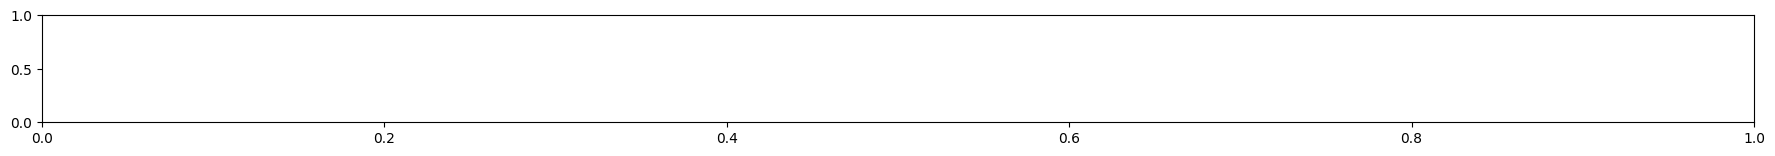

In [103]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = "НА ВЕСЬ ПЕРИОД СТРОИТЕЛЬСТВА"
name_of_slide(slide, f'ГРАФИК 1-ГО УРОВНЯ {object_name}', subinf)

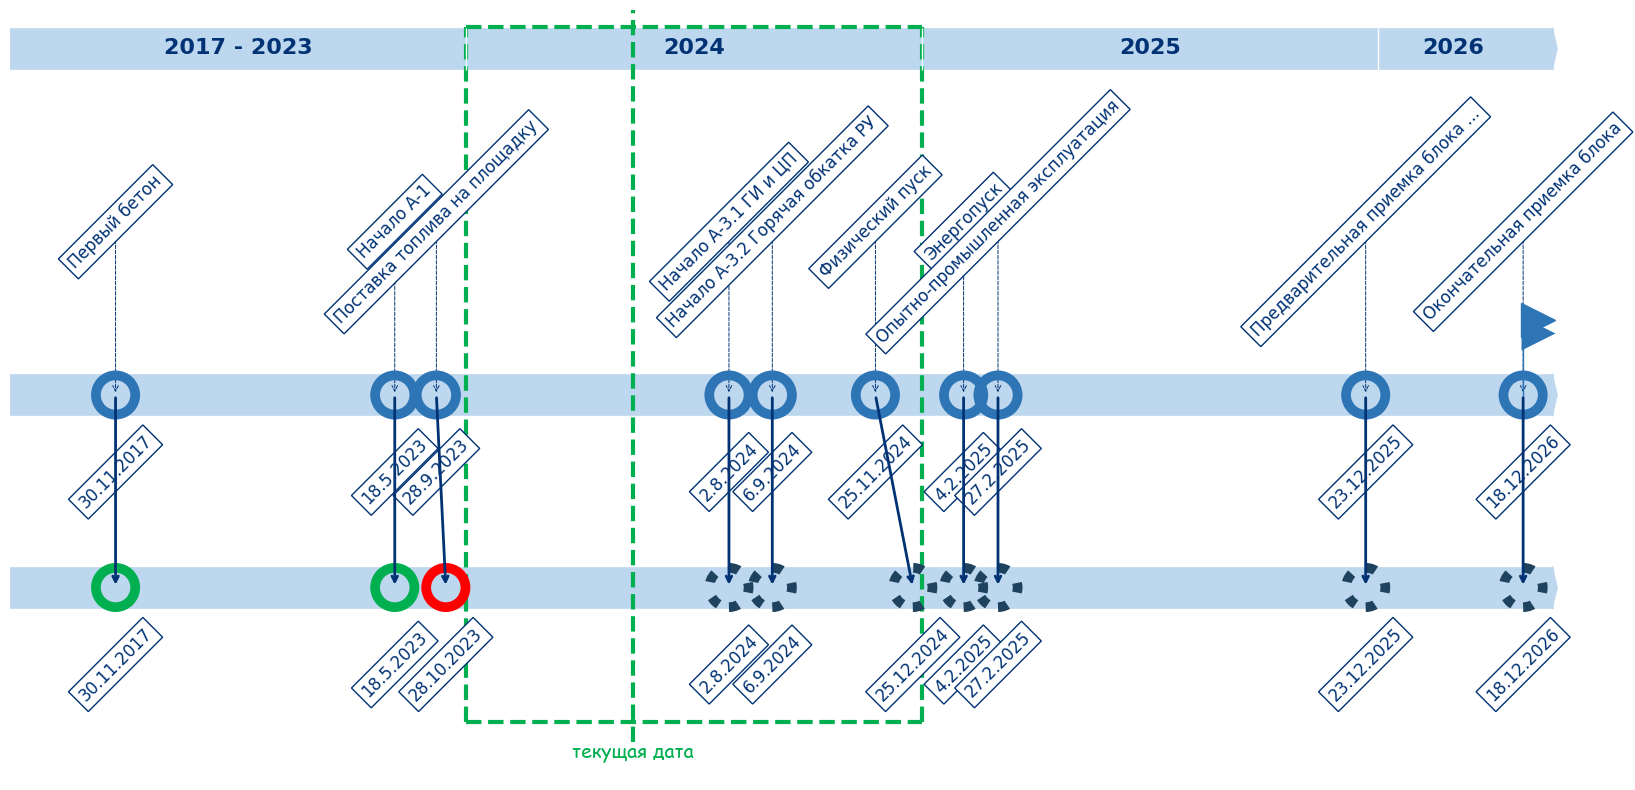

In [104]:
draw_graph_1_lvl(general, graph_1_lvl)

In [105]:
pic = slide.shapes.add_picture("system_photo/1lvlgraph.png", Cm(6.56), Cm(3.05), width=Cm(33.06), height=Cm(18.54))
pic = slide.shapes.add_picture("system_photo/legend1.png", Cm(1.02), Cm(21.2), width=Cm(25.4), height=Cm(0.75))

In [106]:
left = Cm(1.02)
top = Cm(9.5)
width = Cm(6.55)
height = Cm(4.1)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = f'УТВЕРЖДЕННЫЙ ГРАФИК\n{general["object_type"][0][0 : len(general["object_type"][0]) - 1] + "я"} {object_name}'
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(18)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [107]:
left = Cm(1.02)
top = Cm(15.57)
width = Cm(4.63)
height = Cm(1.8)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = f'ФАКТ/ПРОГНОЗ'
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(18)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [108]:
left = Cm(1.02)
top = Cm(14.05)
width = Cm(5.92)
height = Cm(2.39)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = f'Отклонения от\nутвержденного графика'
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(16)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

## Ключевые события

In [109]:
def draw_key_events(ncols, nrows, i0, event_names, signs, volumes, fact_acts, proc_acts, fact_compl_dates, forecast_compl_dates, affects):
    x = 0.85 + len(event_names) * 1.4875
    fig = plt.figure(figsize = (15.2, x))

    # параметры "графика" и "подграфиков"
    flag = 'head'
    widths = [8, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    heights = [0] * nrows
    for i in range(nrows):
        if i == 0 or i == 1:
            heights[i] = 1
        else:
            if i % 2 == 0:
                heights[i] = 2.3
            else:
                heights[i] = 0.7
        
    # создаем сетку графиков
    gs = GridSpec(ncols = ncols, nrows = nrows, figure = fig, wspace=0, hspace=0, width_ratios = widths, height_ratios = heights)
    
    # параметры для текста по умолчанию
    fontsize = 14
    color = '#595959'
    
    # создаем шапку таблицы
    draw_head(fig, gs, fontsize, color, flag)
    
    ########################### рисуем саму таблицу-график ######################################
    # параметры ячеек для таблицы (изменения)
    flag = 'body'
    
    # параметры текста для таблицы (изменения)
    
    # данные для строки
    ##################################################
    #   key_event - ключевое событие                 #
    #   sign - признак                               #
    #   volume - объем по ключевому событию          #
    #   act_completed - фактически выполненное       #
    #   percent_completed - процент выполненного     #
    ##################################################
    ind = 0
    for i in range(2, len(event_names) * 2 + 1, ++ 2):
        # получаем данные для строки
        key_event = event_names[ind]
        sign = signs[ind]
        volume = volumes[ind]
        act_completed = fact_acts[ind]
        percent_completed = proc_acts[ind]
        
        # данные для горизонтальной столбчатой диаграммы
        # обработка текущей даты
        now = general['date'][0].month + general['date'][0].day / 30 - 1
        # прогнозы (факт и план)
        forecasts = [forecast_compl_dates[ind].month - 1 + forecast_compl_dates[ind].day / 30, fact_compl_dates[ind].month - 1 + fact_compl_dates[ind].day / 30]
        # значения факт, план
        factplan = [now, 0]
        # значения дат
        forecast_date_month = f'{forecast_compl_dates[ind].month}'
        if forecast_compl_dates[ind].month // 10 == 0:
            forecast_date_month = f'0{forecast_compl_dates[ind].month}'
        
        forecast_date_day = f'{forecast_compl_dates[ind].day}'
        if forecast_compl_dates[ind].day // 10 == 0:
            forecast_date_day = f'0{forecast_compl_dates[ind].day}'

        fact_date_month = f'{fact_compl_dates[ind].month}'
        if fact_compl_dates[ind].month // 10 == 0:
            fact_date_month = f'0{fact_compl_dates[ind].month}'
        
        fact_date_day = f'{fact_compl_dates[ind].day}'
        if fact_compl_dates[ind].day // 10 == 0:
            fact_date_day = f'0{fact_compl_dates[ind].day}'
            
        dates = [f'{forecast_date_day}.{forecast_date_month}', f'{fact_date_day}.{fact_date_month}']
        
        # отрисовка строки с диаграммой
        draw_row(fig, gs, i, key_event, sign, volume, act_completed, percent_completed, forecasts, factplan, dates, fontsize, color, flag)
    
        # получаем данные для строки
        mark = affects[ind]
        
        # отрисовка строки без диаграммы
        draw_row_without_diagram(fig, gs, i, mark, fontsize, flag, i0)

        ind += 1
    
    # строим линию "текущее время"
    ax = plt.subplot(gs[1 :, 5 : ])
    # настраиваем график
    ax.set_facecolor('None')
    ax.patch.set_alpha(1)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(0, 12)
    
    # получаем текущую дату
    current_date = general['date'][0]
    day = current_date.day
    month = current_date.month - 1
    
    # получаем коррдинаты для прямой
    x_date = month + day / 30
    ymin, ymax = ax.get_ylim()
    ax.plot([x_date, x_date], [ymin, ymax], linestyle = '--', color = '#00B050')
    ax.text(x_date, ymin, 'текущая дата', fontsize = 12, fontfamily = 'cursive', ha = 'center', va = 'top', color = '#00B050')
    
    
    # убираем оси графика
    plt.xticks([])
    plt.yticks([])

    plt.savefig("system_photo/plot.png", dpi=300, bbox_inches='tight')
    plt.show()

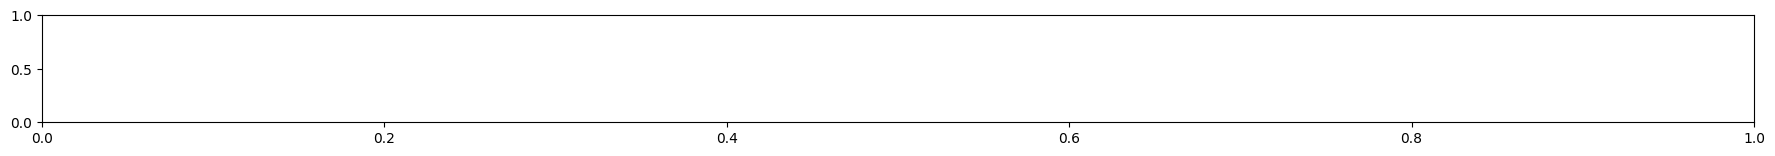

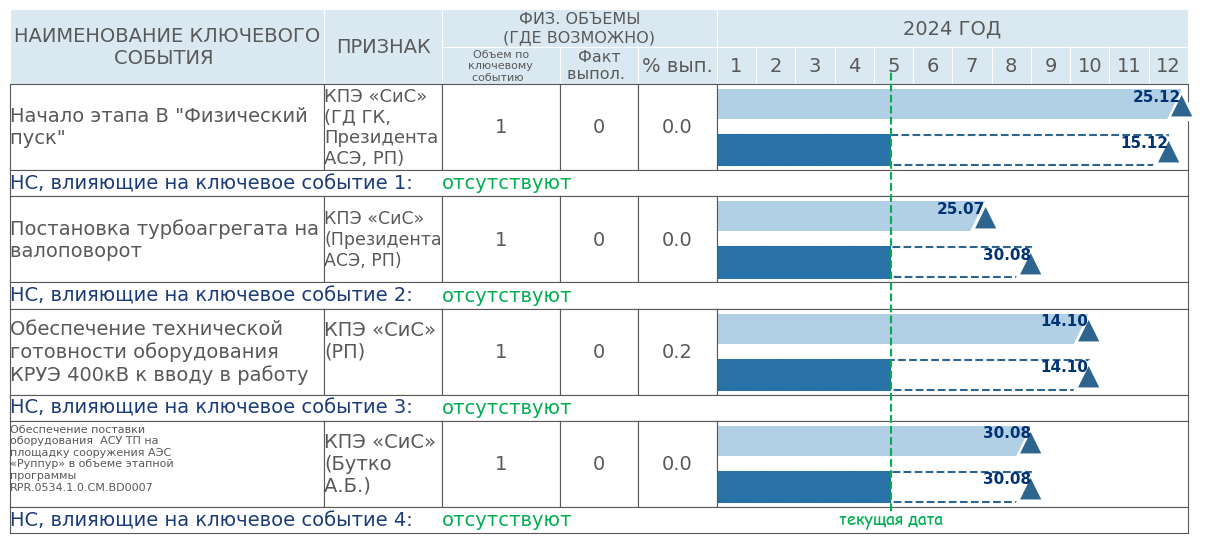

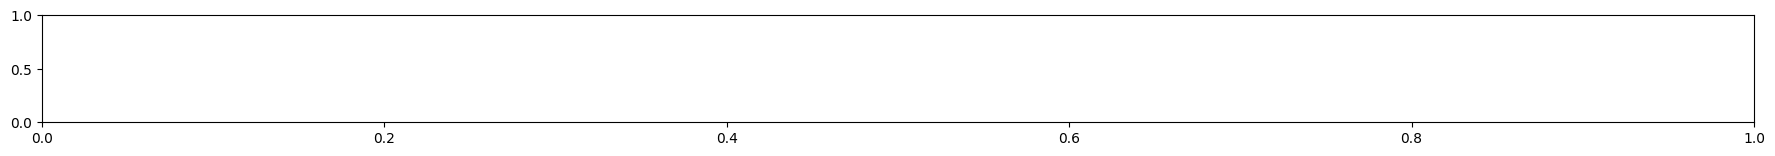

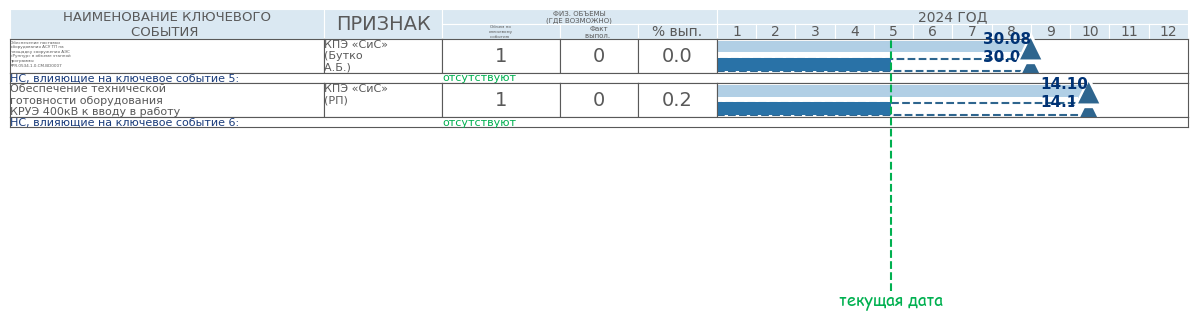

In [110]:
# функция для подсчета количества столбцов и строк
# для этого нужно вытащить список ключевых событий и посчитать их количество
# если событий больше 4, то нужно переносить на другой слайд
# циклом for для каждых 4 ключевых событий создаем третий слайд
# посчитываем количество строк: 2 - шапка, по 2 - на каждое событие
i0 = 0
for i in range(len(key_events['event_name'])):
    if i % 4 == 3 or i == len(key_events['event_name']) - 1:  
        slide = ppt.slides.add_slide(blank_slide_layout)
        shapes = slide.shapes
        # добавление названия слайда
        subinf = "С УКАЗАНИЕМ ФИЗИЧЕСКИХ ОБЪЕМОВ РАБОТ"
        name_of_slide(slide, f'КЛЮЧЕВЫЕ СОБЫТИЯ {general["date"][0].year} ГОДА', subinf)
        # вставка графика
        nrows = 2 + 2 * (i + 1)  # 2 - на шапку таблицы, по 2 на каждое событие
        ncols = 17
        draw_key_events(ncols, nrows, i0, list(key_events['event_name'][i0 : i + 1]), list(key_events['sign'][i0 : i + 1]), list(key_events['volume'][i0 : i + 1]), list(key_events['fact_act'][i0 : i + 1]), list(key_events['proc_act'][i0 : i + 1]), list(key_events['fact_compl_date'][i0 : i + 1]), list(key_events['forecast_compl_date'][i0 : i + 1]), list(key_events['affect'][i0 : i + 1]))
        i0 = i + 1
        # на слайд
        pic = slide.shapes.add_picture(plot_path, Inches(0.401575), Inches(1.2), width=Inches(15.2), height=Inches(7.4))
        pic = slide.shapes.add_picture("system_photo/legend2.png", Cm(1.25), Cm(22.11), width=Cm(15.06), height=Cm(0.73))

## Выполнение плана по освоению

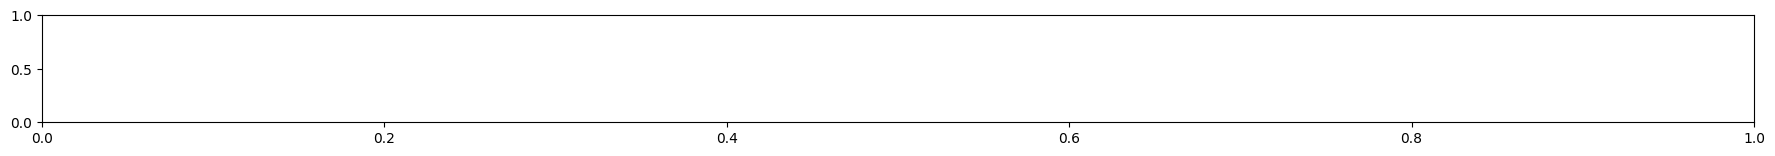

In [111]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = f'ПО ПРОЕКТУ {object_name}'
name_of_slide(slide, f'ВЫПОЛНЕНИЕ ПЛАНА ПО ОСВОЕНИЮ {general["date"][0].year} ГОДА', subinf)

In [112]:
left = Cm(0.29)
top = Cm(1.76)
width = Cm(39.84)
height = Cm(2.48)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = "ВЫПОЛНЕНИЕ ПРОГРАММЫ 2024 ГОДА (ОСВОЕНИЕ), млн. долл."
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(20)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [113]:
top = Cm(4.05)
table = draw_table(shapes, top)

for i in range(3, 10):
    for j in range(2, 11):
        if j == 2 or j == 7 or j == 9 or j == 10:
            table.cell(i, j).text = str(development_plan.iloc[i - 3, j - 2]) + "%"
            if j == 7 and development_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "-"
        elif j == 3 or j == 4 or j == 5:
            table.cell(i, j).text = str(development_plan.iloc[i - 3, j - 2])
        elif j == 6:
            table.cell(i, j).text = "(+" + str(development_plan.iloc[i - 3, j - 2]) + ")"
            if development_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "0"
        else:
            table.cell(i, j).text = "(" + str(development_plan.iloc[i - 3, j - 2]) + "%)"
            if j == 8 and development_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "-"

cnt = 0
for row in table.rows:
    for cell in row.cells:
        cell.text_frame.paragraphs[0].vertical_anchor = MSO_ANCHOR.MIDDLE
        cell.text_frame.paragraphs[0].font.size = Pt(10)
        cell.text_frame.paragraphs[0].alignment = pptx.enum.text.PP_ALIGN.CENTER
        cell.text_frame.paragraphs[0].font.name = "Arial Narrow"
        cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(89, 89, 89)
            
        fill = cell.fill
        fill.solid()
        if cnt <= 2:
            fill.fore_color.rgb = RGBColor(218, 232, 242)
        else:
            fill.fore_color.rgb = RGBColor(255, 255, 255)
    cnt += 1

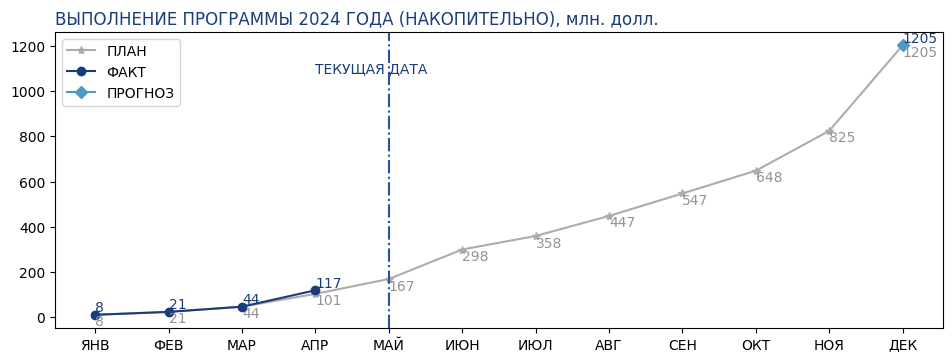

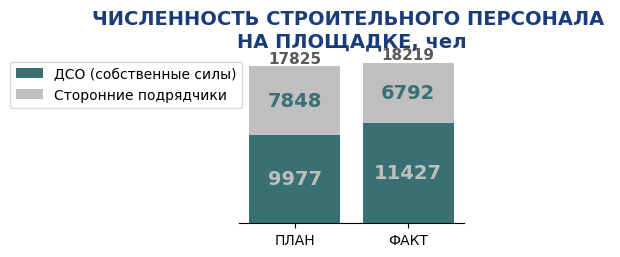

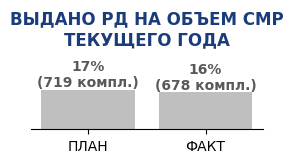

In [114]:
draw_dev_plan_graph_accum(general, accumulative_execution)
draw_dev_plan_diag_1(dev_plan_diag_1)
draw_dev_plan_diag_2(dev_plan_diag_2)

In [115]:
pic = slide.shapes.add_picture("system_photo/dev_plan_graph_accum.png", Inches(0.161417), Inches(4.77), width=Inches(11.46), height=Inches(3.85))

In [116]:
pic = slide.shapes.add_picture("system_photo/dev_plan_diag_1.png", Cm(29.3), Cm(11.74), width=Cm(10.83), height=Cm(6.8))

In [117]:
pic = slide.shapes.add_picture("system_photo/dev_plan_diag_2.png", Cm(31.67), Cm(17.87), width=Cm(7.49), height=Cm(4.23))

In [118]:
# For adjusting the  Margins in inches 
left = Cm(0.77)
top = Cm(21.26)
height = Cm(1.45)
width = Cm(38.85)
          
# creating textBox 
txBox = slide.shapes.add_textbox(left, top, 
                                         width, height) 
          
# creating textFrames 
tf = txBox.text_frame 
# adding Paragraphs
p = tf.add_paragraph()  
          
# adding text 
p.text = "Какие-то сноски"
          
# font  
p.font.name = "Arial Narrow"
p.font.size = Pt(10)
p.font.color.rgb = RGBColor(89, 89, 89)

## Выполнение плана по освоению по структуре затрат

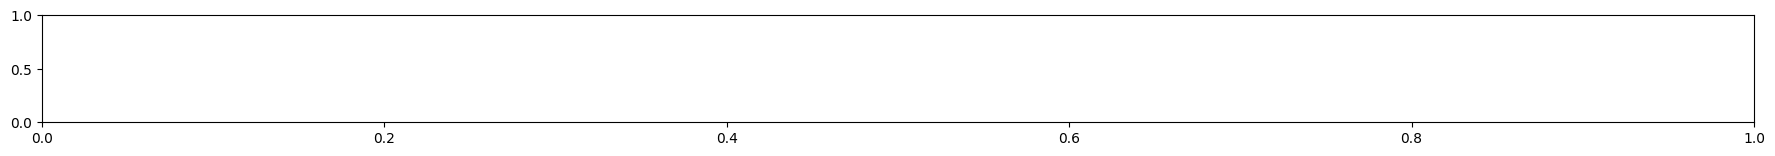

In [119]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = f'ПО ПРОЕКТУ {object_name}'
name_of_slide(slide, f'ВЫПОЛНЕНИЕ ПЛАНА ПО ОСВОЕНИЮ {general["date"][0].year} ГОДА ПО СТРУКТУРЕ ЗАТРАТ', subinf)

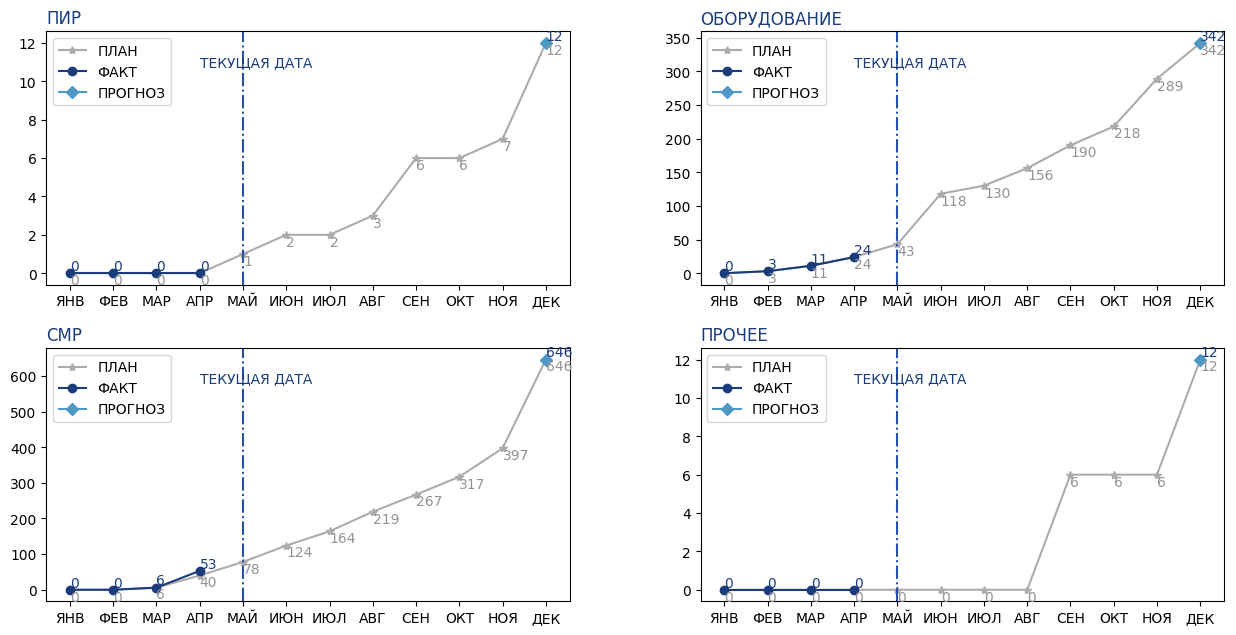

In [120]:
draw_dev_plan_structure(general, pir, equipment, smr, other)

In [121]:
pic = slide.shapes.add_picture("system_photo/dev_plan_structure.png", Inches(0.401575), Inches(1.2), width=Inches(15.2), height=Inches(7.4))

## Выполнение плана по реализации

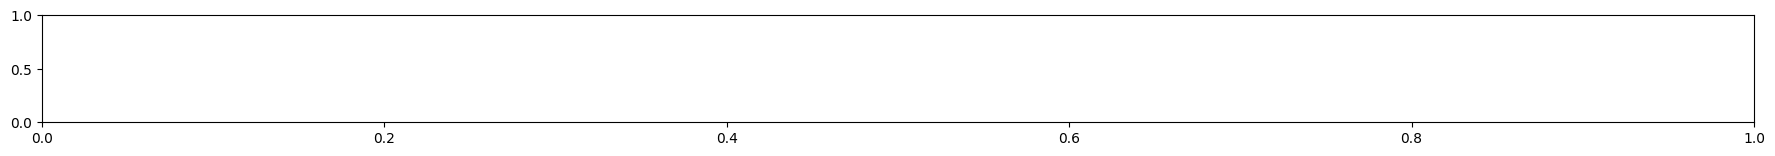

In [122]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = f'ПО ПРОЕКТУ {object_name}'
name_of_slide(slide, f'ВЫПОЛНЕНИЕ ПЛАНА ПО РЕАЛИЗАЦИИ {general["date"][0].year} ГОДА', subinf)

In [123]:
left = Cm(0.29)
top = Cm(1.76)
width = Cm(39.84)
height = Cm(2.48)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = "ВЫПОЛНЕНИЕ ПРОГРАММЫ 2024 ГОДА (РЕАЛИЗАЦИЯ), млн. долл."
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(20)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [124]:
top = Cm(4.05)
table = draw_table(shapes, top)

for i in range(3, 10):
    for j in range(2, 11):
        if j == 2 or j == 7 or j == 9 or j == 10:
            table.cell(i, j).text = str(realization_plan.iloc[i - 3, j - 2]) + "%"
            if j == 7 and realization_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "-"
        elif j == 3 or j == 4 or j == 5:
            table.cell(i, j).text = str(realization_plan.iloc[i - 3, j - 2])
        elif j == 6:
            table.cell(i, j).text = "(+" + str(realization_plan.iloc[i - 3, j - 2]) + ")"
            if realization_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "0"
        else:
            table.cell(i, j).text = "(" + str(realization_plan.iloc[i - 3, j - 2]) + "%)"
            if j == 8 and realization_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "-"

cnt = 0
for row in table.rows:
    for cell in row.cells:
        cell.text_frame.paragraphs[0].vertical_anchor = MSO_ANCHOR.MIDDLE
        cell.text_frame.paragraphs[0].font.size = Pt(10)
        cell.text_frame.paragraphs[0].alignment = pptx.enum.text.PP_ALIGN.CENTER
        cell.text_frame.paragraphs[0].font.name = "Arial Narrow"
        cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(89, 89, 89)
            
        fill = cell.fill
        fill.solid()
        if cnt <= 2:
            fill.fore_color.rgb = RGBColor(218, 232, 242)
        else:
            fill.fore_color.rgb = RGBColor(255, 255, 255)
    cnt += 1

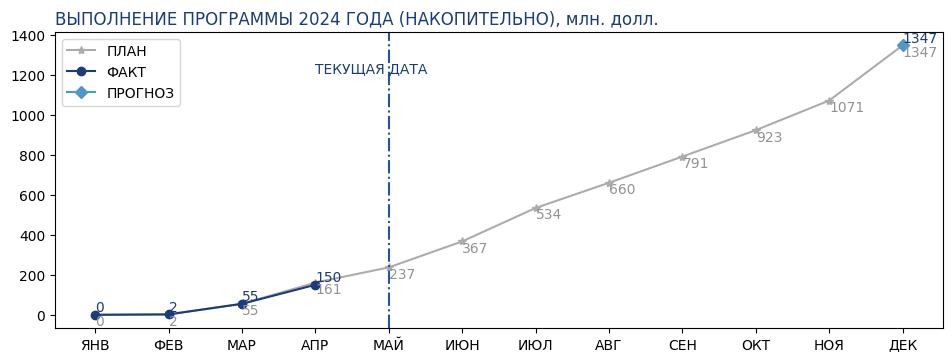

In [125]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(11.46, 3.85)
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)
x = ['ЯНВ', 'ФЕВ', 'МАР', 'АПР', 'МАЙ', 'ИЮН', 'ИЮЛ', 'АВГ', 'СЕН', 'ОКТ', 'НОЯ', 'ДЕК']
plan_y = np.array(accumulative_realization.iloc[0])
fact_y = list([])
i = 0
while i != general['date'][0].month - 1:
    fact_y.append(accumulative_realization.iloc[1, i])
    i += 1
fact_y = np.array(fact_y)
pred_y = np.array([accumulative_realization.iloc[2, 11]])
make_graph(ax, "ВЫПОЛНЕНИЕ ПРОГРАММЫ 2024 ГОДА (НАКОПИТЕЛЬНО), млн. долл.", x, plan_y, fact_y, pred_y)

plt.savefig("system_photo/plot.png", dpi=300, bbox_inches='tight')
#plt.show()

In [126]:
pic = slide.shapes.add_picture(plot_path, Cm(2.71), top = Cm(11.53), width=Cm(34.96), height=Cm(10.72))

In [127]:
# For adjusting the  Margins in inches 
left = Cm(0.77)
top = Cm(21.26)
height = Cm(1.45)
width = Cm(38.85)
          
# creating textBox 
txBox = slide.shapes.add_textbox(left, top, 
                                         width, height) 
          
# creating textFrames 
tf = txBox.text_frame 
# adding Paragraphs
p = tf.add_paragraph()  
          
# adding text 
p.text = "Какие-то сноски"
          
# font  
p.font.name = "Arial Narrow"
p.font.size = Pt(10)
p.font.color.rgb = RGBColor(89, 89, 89)

## Выполнение показателя "зарубежная выручка"

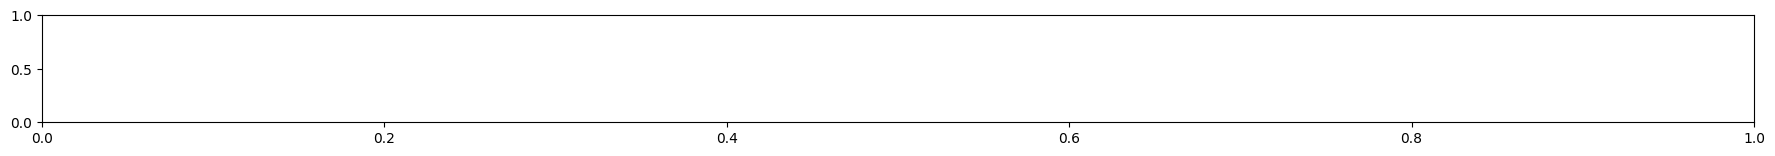

In [128]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = f'ПО ПРОЕКТУ {object_name}'
name_of_slide(slide, f'ВЫПОЛНЕНИЕ ПОКАЗАТЕЛЯ "ЗАРУБЕЖНАЯ ВЫРУЧКА" В {general["date"][0].year} ГОДУ', subinf)

In [129]:
left = Cm(0.29)
top = Cm(1.76)
width = Cm(39.84)
height = Cm(2.48)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = "ВЫПОЛНЕНИЕ ПРОГРАММЫ 2024 ГОДА (ЗАРУБЕЖНАЯ ВЫРУЧКА), млн. долл."
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(20)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [130]:
top = Cm(4.05)
table = draw_table(shapes, top)

for i in range(3, 10):
    for j in range(2, 11):
        if j == 2 or j == 7 or j == 9 or j == 10:
            table.cell(i, j).text = str(realization_plan.iloc[i - 3, j - 2]) + "%"
            if j == 7 and realization_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "-"
        elif j == 3 or j == 4 or j == 5:
            table.cell(i, j).text = str(realization_plan.iloc[i - 3, j - 2])
        elif j == 6:
            table.cell(i, j).text = "(+" + str(realization_plan.iloc[i - 3, j - 2]) + ")"
            if realization_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "0"
        else:
            table.cell(i, j).text = "(" + str(realization_plan.iloc[i - 3, j - 2]) + "%)"
            if j == 8 and realization_plan.iloc[i - 3, j - 2] == 0:
                table.cell(i, j).text = "-"

cnt = 0
for row in table.rows:
    for cell in row.cells:
        cell.text_frame.paragraphs[0].vertical_anchor = MSO_ANCHOR.MIDDLE
        cell.text_frame.paragraphs[0].font.size = Pt(10)
        cell.text_frame.paragraphs[0].alignment = pptx.enum.text.PP_ALIGN.CENTER
        cell.text_frame.paragraphs[0].font.name = "Arial Narrow"
        cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(89, 89, 89)
            
        fill = cell.fill
        fill.solid()
        if cnt <= 2:
            fill.fore_color.rgb = RGBColor(218, 232, 242)
        else:
            fill.fore_color.rgb = RGBColor(255, 255, 255)
    cnt += 1

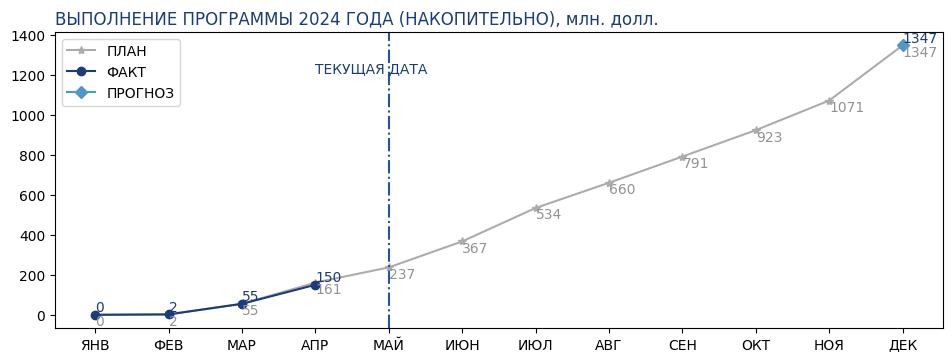

In [131]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(11.46, 3.85)
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)
x = ['ЯНВ', 'ФЕВ', 'МАР', 'АПР', 'МАЙ', 'ИЮН', 'ИЮЛ', 'АВГ', 'СЕН', 'ОКТ', 'НОЯ', 'ДЕК']
plan_y = np.array(foreign_revenue_accum.iloc[0])
fact_y = list([])
i = 0
while i != general['date'][0].month - 1:
    fact_y.append(foreign_revenue_accum.iloc[1, i])
    i += 1
fact_y = np.array(fact_y)
pred_y = np.array([foreign_revenue_accum.iloc[2, 11]])
make_graph(ax, "ВЫПОЛНЕНИЕ ПРОГРАММЫ 2024 ГОДА (НАКОПИТЕЛЬНО), млн. долл.", x, plan_y, fact_y, pred_y)

plt.savefig("system_photo/plot.png", dpi=300, bbox_inches='tight')
#plt.show()

In [132]:
pic = slide.shapes.add_picture(plot_path, Cm(2.71), top = Cm(11.53), width=Cm(34.96), height=Cm(10.72))

## Приложения

In [133]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
app_flag = len(ppt.slides) - 1

In [134]:
background13 = shapes.add_shape(MSO_SHAPE.RECTANGLE, Inches(0), Inches(0), Inches(16), Inches(9))
fill = background13.fill
fill.solid()
fill.fore_color.rgb = RGBColor(255, 255, 255)
background13.line.color.rgb = RGBColor(255, 255, 255)
shadow = background13.shadow
shadow.inherit = False

In [135]:
rec = shapes.add_shape(MSO_SHAPE.RECTANGLE, Cm(10.44), Cm(0), Cm(2.53), Cm(11.18))
fill = rec.fill
fill.solid()
fill.fore_color.rgb = RGBColor(58, 123, 168)
rec.line.color.rgb = RGBColor(58, 123, 168)
shadow = rec.shadow
shadow.inherit = False

In [136]:
left = Cm(13.8)
top = Cm(7.78)
width = Cm(12.18)
height = Cm(3.59)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = "ПРИЛОЖЕНИЯ"
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.bold = True
p.font.size = Pt(54)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(58, 123, 168)

## Статус выдачи рд на объем смр

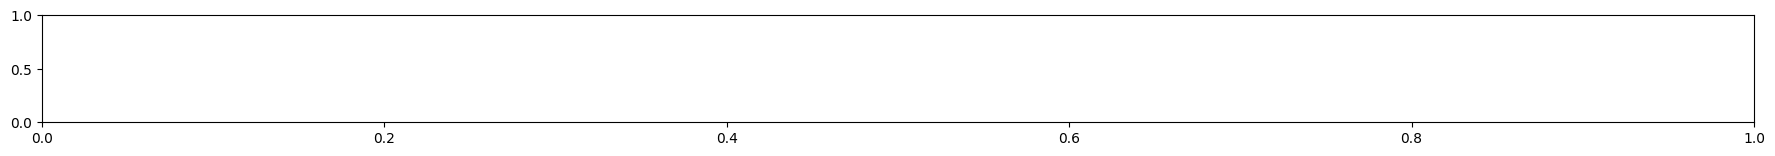

In [137]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = ""
name_of_slide(slide, f'СТАТУС ВЫДАЧИ РД НА ОБЪЕМ СМР {general["date"][0].year} ГОДУ', subinf)

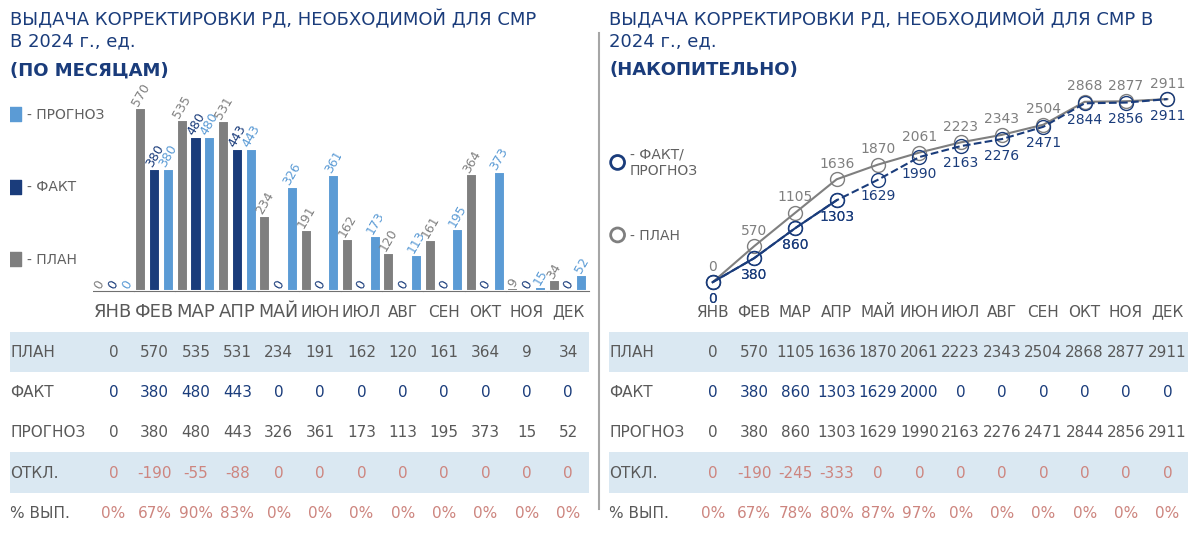

In [138]:
draw_RD_SMR_graphs(general, RD_month, RD_accumulative)

In [139]:
pic = slide.shapes.add_picture(plot_path, Inches(0.401575), Cm(3.12), width=Inches(15.2), height=Inches(7.4))

## Численность строительного персонала на площадке

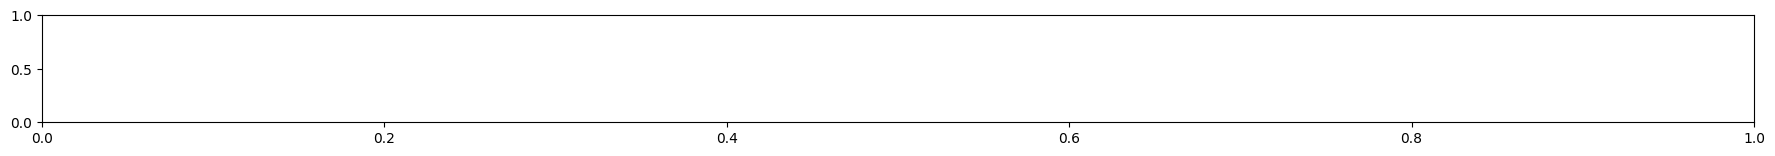

In [140]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = ""
name_of_slide(slide, f'ЧИСЛЕННОСТЬ СТРОИТЕЛЬНОГО ПЕРСОНАЛА НА ПЛОЩАДКЕ В {general["date"][0].year} ГОДУ', subinf)

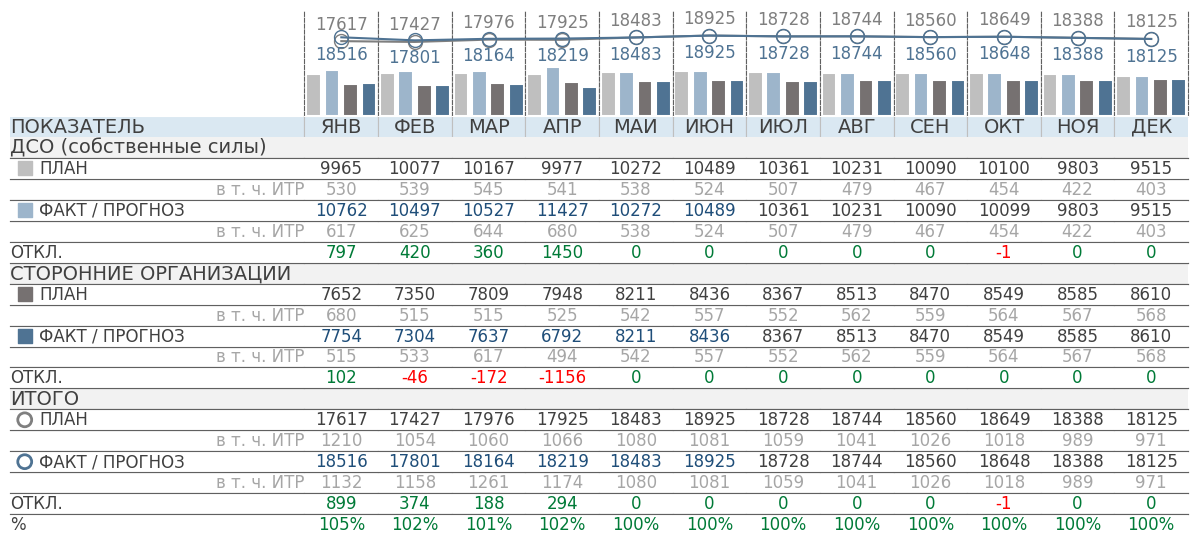

In [141]:
draw_big_table(num_of_builders)

In [142]:
pic = slide.shapes.add_picture(plot_path, Inches(0.401575), Inches(1.4), width=Inches(15.2), height=Inches(7.4))

In [143]:
left = Cm(0.29)
top = Cm(1.76)
width = Cm(39.84)
height = Cm(2.48)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = "ЧИСЛЕННОСТЬ СТРОИТЕЛЬНОГО ПЕРСОНАЛА, чел."
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(20)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

## Инвентаризация проекта на предмет наличия рисков срыва поставок оборудования и комплектующих из 3-х стран

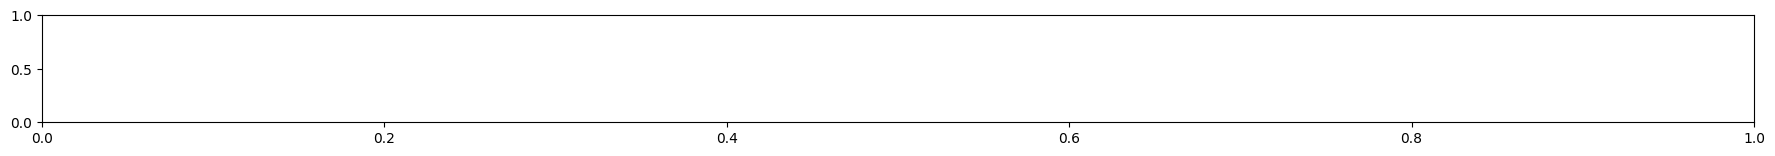

In [144]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = ""
name_of_slide(slide, f'ИНВЕНТАРИЗАЦИЯ ПРОЕКТА СООРУЖЕНИЕ {object_name} НА ПРЕДМЕТ НАЛИЧИЯ РИСКОВ СРЫВА ПОСТАВОК ОБОРУДОВАНИЯ И КОМПЛЕКТУЮЩИХ ИЗ 3-Х СТРАН', subinf)

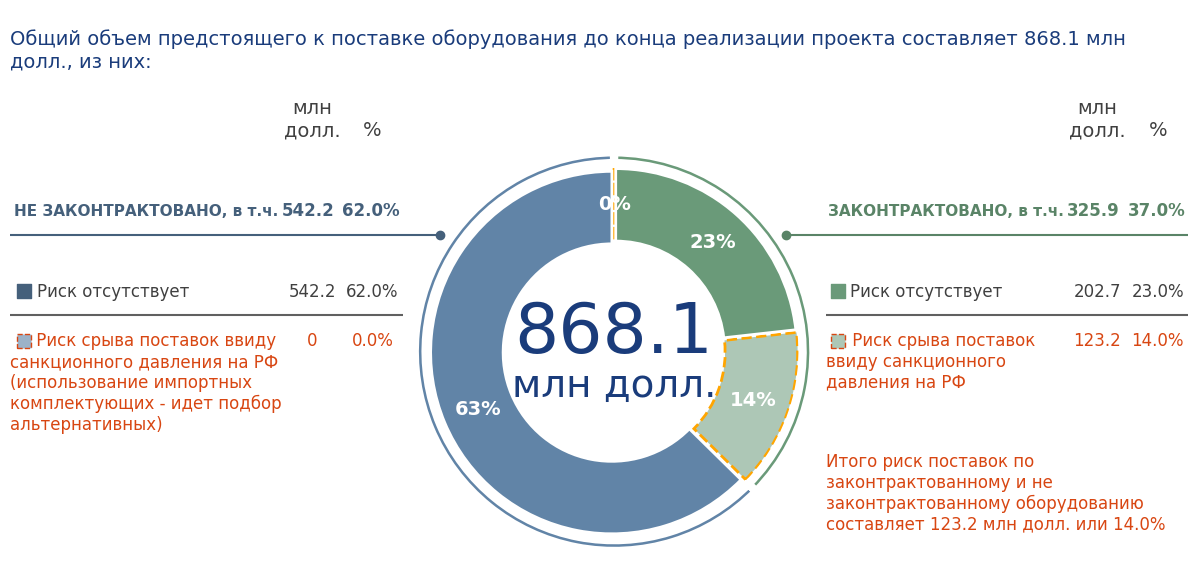

In [145]:
draw_inventory_diagram(inventory)

In [146]:
pic = slide.shapes.add_picture(plot_path, Inches(0.401575), Inches(1.2), width=Inches(15.2), height=Inches(7.4))

## Статус выполнения поручений ген директора

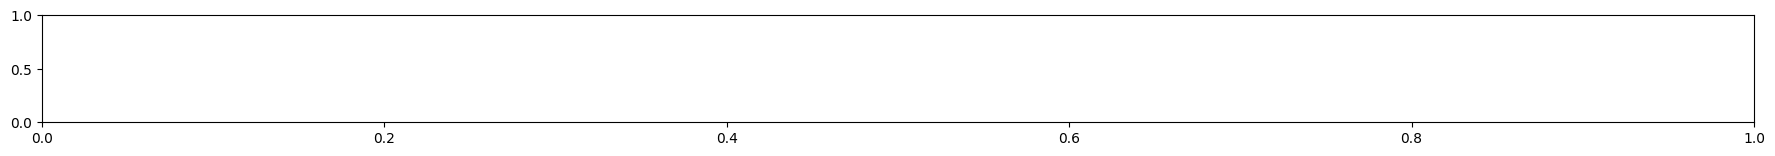

In [147]:
# создаем слайд
slide = ppt.slides.add_slide(blank_slide_layout)
shapes = slide.shapes
subinf = ""
name_of_slide(slide, f'СТАТУС ВЫПОЛНЕНИЯ ПОРУЧЕНИЙ ГЕНЕРАЛЬНОГО ДИРЕКТОРА В РАМКАХ ПРОЕКТА СТРОИТЕЛЬСТВА', subinf)

In [148]:
left = Cm(0.29)
top = Cm(1.76)
width = Cm(39.84)
height = Cm(2.48)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
# Enable word wrap
tf.word_wrap = True
p = tf.add_paragraph()
p.text = "СТАТУС ВЫПОЛНЕНИЯ ПОРУЧЕНИЙ ГЕНЕРАЛЬНОГО ДИРЕКТОРА В РАМКАХ ПРОЕКТА СТРОИТЕЛЬСТВА"
# Optionally, if you want to center the entire textbox including its vertical position
tf.vertical_anchor = MSO_ANCHOR.MIDDLE
# Center the paragraph text
p.alignment = PP_ALIGN.LEFT
p.font.size = Pt(20)
p.font.name = "Arial Narrow"
p.font.color.rgb = RGBColor(32, 56, 100)

In [149]:
rows = 3
cols = 6
left = Cm(0.41)
top = Cm(4.05)
width = Cm(39.63)
height = Cm(7.54)

table = shapes.add_table(rows, cols, left, top, width, height).table

table.cell(0, 0).text = "№"
table.cell(0, 1).text = "ПОРУЧЕНИЕ"
table.cell(0, 2).text = "СРОК ВЫПОЛНЕНИЯ"
table.cell(0, 3).text = "ОТВ."
table.cell(0, 4).text = "СТАТУС (выполнено / не выполнено / срок не наступил)"
table.cell(0, 5).text = "КОММЕНТАРИИ"

table.cell(1, 0).text = "1"
table.cell(1, 1).text = "7.1. Дерию А.В., Зотеевой А.Г., Шперле О.Н. совместно с Петровым А.Ю., Комаровым К.Б. и Сахаровым Г.С. обеспечить максимальную концентрацию усилий по достижению выполнения событий, связанных с физическим пуском соответствующих блоков по проектам сооружения АЭС «Аккую», АЭС «Руппур» и Курской АЭС в соответствии с утвержденными сроками по их реализации. Дерию А.В., Зотеевой А.Г., Шперле О.Н. в рамках докладов о ходе реализации проектов к заседаниям Операционного комитета Госкорпорации «Росатом» уделять особое внимание прогнозу исполнения ключевого события «Физический пуск» и рисках его выполнения. (Протокол заседания Операционного комитета ГК «Росатом» от 15.11.2023 №1-ОК/114-Пр)."
table.cell(1, 2).text = "в рамках докладов о ходе реализации проектов к заседаниям Операционного комитета Госкорпорации «Росатом»"
table.cell(1, 3).text = "Дерий А.В., Зотеева А.Г., Шперле О.Н., Петров А.Ю."
table.cell(1, 4).text = "Будет учтено в рамках доклада на текущем и последующих заседаниях Операционного комитета Госкорпорации «Росатом»"
table.cell(1, 5).text = "Контроль за выполнением поставленной задачи по обеспечению физического пуска  Блока 1 АЭС «Руппур» в 2024 году, а также принятие всех необходимый решений проводится в рамках ежемесячных штабов под председательством А.Ю. Петрова."

table.cell(2, 0).text = "2"
table.cell(2, 1).text = "2.2. Дерию А.В. по согласованию с Петровым А.Ю. и Волковым Д.А. к следующему очередному тематическому заседанию Операционного комитета ГК «Росатом» откорректировать доклад о ходе реализации проекта сооружения АЭС «Руппур», блоки 1-2, в части детализации этапов и событий, находящихся на критическом пути реализации проекта в 2024 - 2025 г.г. (Протокол заседания Операционного комитета ГК «Росатом» от 18.04.2024 №1-ОК/23-Пр)."
table.cell(2, 2).text = "13.05.2024"
table.cell(2, 3).text = "Дерий А.В."
table.cell(2, 4).text = "Выполнено"

cnt = 0
# set column widths
for col in table.columns:
    if cnt == 1:
        col.width = Cm(11.5)
    elif cnt == 0:
        col.width = Cm(1.5)
    cnt += 1
cnt = 0
for row in table.rows:
    for cell in row.cells:
        cell.text_frame.paragraphs[0].vertical_anchor = MSO_ANCHOR.MIDDLE
        cell.text_frame.paragraphs[0].font.size = Pt(12)
        cell.text_frame.paragraphs[0].alignment = pptx.enum.text.PP_ALIGN.CENTER
        cell.text_frame.paragraphs[0].font.name = "Arial Narrow"
        cell.text_frame.paragraphs[0].font.color.rgb = RGBColor(89, 89, 89)
        
        fill = cell.fill
        fill.solid()
        if cnt == 0:
            fill.fore_color.rgb = RGBColor(218, 232, 242)
        else:
            fill.fore_color.rgb = RGBColor(255, 255, 255)
    cnt += 1

## Оформление для всех страниц (нумерация и т. д.)

In [150]:
cnt = 0
for slide in ppt.slides:
    if cnt != 0 and cnt != app_flag:
        line = slide.shapes.add_shape(MSO_SHAPE.ROUNDED_RECTANGLE, Inches(0.4), Inches(8.7), Inches(15.2), Inches(0))
        line.line.color.rgb = RGBColor(230, 230, 230)
        shadow = line.shadow
        shadow.inherit = False

        # For adjusting the  Margins in inches 
        left = Inches(15.62992125984252) - Pt(10) * ((cnt + 1) // 10)
        top = Inches(8.295275590551181)
        height = width = Inches(1)
          
        # creating textBox 
        txBox = slide.shapes.add_textbox(left, top, 
                                         width, height) 
          
        # creating textFrames 
        tf = txBox.text_frame 
        # adding Paragraphs 
        p = tf.add_paragraph()  
          
        # adding text 
        p.text = f'{cnt + 1}' 
          
        # font  
        p.font.bold = True
        p.font.name = "Arial Narrow"
        p.font.size = Pt(20)
        p.font.color.rgb = RGBColor(89, 89, 89)


        line2 = slide.shapes.add_shape(MSO_SHAPE.ROUNDED_RECTANGLE, Inches(0.4), Inches(1.16), Inches(15.2), Inches(0))
        line2.line.color.rgb = RGBColor(26, 60, 123)
        shadow = line2.shadow
        shadow.inherit = False

        pic = slide.shapes.add_picture(icon2_path, Cm(0.41), Cm(0.35), width=Cm(2.38), height=Cm(2.53))
    cnt += 1

# Сохранение и закрытие презентации

In [151]:
# сохранение
ppt.save('now.pptx') 
print("Done")

Done
